In [384]:
import pandas as pd
import re
import unicodedata
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Lectura del archivo Internet
Se define la ruta del archivo excel y se crea el objeto ExcelFile

In [ ]:
ruta_archivo = '/Internet.xlsx'
archivo_excel = pd.ExcelFile(ruta_archivo)


Se guarda cada hoja en un DataFrame dentro del diccionario hojas_datos, donde cada clave es el nombre de la hoja y el valor es el DataFrame correspondiente.
Con esto, se podrán limpiar y transformar los datos de cada hoja individualmente.

In [386]:
nombres_hojas = archivo_excel.sheet_names
hojas_data = {nombre_hoja: archivo_excel.parse(nombre_hoja) for nombre_hoja in nombres_hojas}

Se imprime la lista de nombres de hojas definida en nombres_hojas

In [387]:
print(nombres_hojas)

['Acc_vel_loc_sinrangos', 'Velocidad_sin_Rangos', 'Accesos_tecnologia_localidad', 'Velocidad % por prov', 'Totales VMD', 'Totales Accesos Por Tecnología', 'Accesos Por Tecnología', 'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Totales Accesos por rango', 'Accesos por rangos', 'Dial-BAf', 'Totales Dial-BAf', 'Ingresos ']


Se revisan las primeras filas de cada DataFrame

In [388]:
for i, (nombre_hoja, df) in enumerate(hojas_data.items(), start=1):
    print(f"\nHoja{i}: {nombre_hoja}")  
    print(df.head())  


Hoja1: Acc_vel_loc_sinrangos
        Partido   Localidad  link Indec Velocidad (Mbps)  Provincia  Accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.00      1.0
1  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.50      2.0
2  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.75     19.0
3  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       3.00     85.0
4  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       3.50    145.0

Hoja2: Velocidad_sin_Rangos
    Año  Trimestre     Provincia  Velocidad  Accesos
0  2024          2  BUENOS AIRES       75.0     1062
1  2024          2  BUENOS AIRES       59.0       59
2  2024          2  BUENOS AIRES      480.0        5
3  2024          2  BUENOS AIRES        3.5    41735
4  2024          2  BUENOS AIRES       18.0     1042

Hoja3: Accesos_tecnologia_localidad
      Provincia     Partido   Localidad    Tecnologia Link Indec  Accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo          A

    Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0  2024          2     Buenos Aires         25287.0              23034.0   
1  2024          2  Capital Federal           518.0               4122.0   
2  2024          2        Catamarca            72.0                164.0   
3  2024          2            Chaco           236.0                349.0   
4  2024          2           Chubut           125.0               1139.0   

   + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
0           222627.0            221660.0             244528.0   
1            24539.0             40296.0              33158.0   
2             2660.0              3093.0               3799.0   
3            14594.0              8336.0               6208.0   
4            43699.0             31971.0              22696.0   

   + 20 Mbps - 30 Mbps  + 30 Mbps     OTROS      Total  
0             106302.0  4020395.0  125547.0  4989380.0  
1               5633.0  1355333.0     

Se estandarizan los nombres de las columnas y títulos de los DataFrames.

In [389]:
def estandarizar_nombre_columna(columnas, nombres_hojas):
    """
    Estandariza nombres de columnas y títulos de hojas de Excel(guardadas en DataFrames).
    Convierte todo a minúsculas, reemplaza espacios por guiones bajos, elimina caracteres especiales,
    elimina los acentos y reemplaza la 'ñ' por 'ni'.
    """
    def reemplazar_caracteres_especiales(texto):
        # Reemplazar 'ñ' por 'ni' antes de la normalización de acentos
        texto = texto.replace('ñ', 'ni')
        
        # Normalizar texto para eliminar acentos (y otros caracteres especiales si los hubiera)
        texto = unicodedata.normalize('NFD', texto)  # Descomponer caracteres acentuados
        texto = ''.join([c for c in texto if unicodedata.category(c) != 'Mn'])  # Eliminar acentos
        
        # Convertir a minúsculas y reemplazar espacios por guiones bajos
        texto = texto.lower().replace(' ', '_')
        
        # Eliminar caracteres no alfanuméricos (excepto guiones bajos)
        texto = re.sub(r'[^a-z0-9_]', '', texto)
        
        return texto

    # Establecer los encabezados y hojas estandarizados
    encabezados_estandarizados = [reemplazar_caracteres_especiales(col) for col in columnas]
    hojas_estandarizadas = [reemplazar_caracteres_especiales(hoja) for hoja in nombres_hojas]
    
    return encabezados_estandarizados, hojas_estandarizadas


Diccionario para almacenar los datos con nombres de hojas estandarizados

In [390]:
hojas_data_estandarizado = {}
nombres_hojas_estandarizadas = []

In [391]:
for idx, (nombre_hoja, df) in enumerate(hojas_data.items(), start=1):
    # Obtener los encabezados estandarizados y el nombre de la hoja
    encabezados_estandarizados, hojas_estandarizadas = estandarizar_nombre_columna(df.columns, [nombre_hoja])

    # Renombrar los encabezados en el DataFrame
    df.columns = encabezados_estandarizados

    # Almacenar el DataFrame con el nombre de hoja estandarizado
    hojas_data_estandarizado[hojas_estandarizadas[0]] = df
    nombres_hojas_estandarizadas.append(hojas_estandarizadas[0])

    """# Imprimir el número de la hoja y los encabezados estandarizados
    print(f"Encabezados estandarizados:")
    print(f"Hoja {idx} : {hojas_estandarizadas[0]}")
    print(df.head())"""


Actualizar nombres_hojas con los nombres estandarizados

In [392]:
nombres_hojas = nombres_hojas_estandarizadas
hojas_data = hojas_data_estandarizado

In [393]:
print(nombres_hojas)

['acc_vel_loc_sinrangos', 'velocidad_sin_rangos', 'accesos_tecnologia_localidad', 'velocidad__por_prov', 'totales_vmd', 'totales_accesos_por_tecnologia', 'accesos_por_tecnologia', 'penetracionpoblacion', 'penetracionhogares', 'penetraciontotales', 'totales_accesos_por_rango', 'accesos_por_rangos', 'dialbaf', 'totales_dialbaf', 'ingresos_']


Se corrigen los nombres de los DataFrames que siguen presentando errores mediante un mapeo de claves.

In [394]:
mapeo_nombres = {
    'acc_vel_loc_sinrangos': 'acc_vel_loc_sin_rangos',
    'velocidad__por_prov': 'porcentaje_vel_por_prov',
    'penetracionpoblacion': 'penetracion_poblacion',
    'penetracionhogares': 'penetracion_hogares',
    'penetraciontotales': 'penetracion_totales',
    'ingresos_': 'ingresos'
}
hojas_data = {mapeo_nombres.get(clave, clave): valor for clave, valor in hojas_data.items()}


In [395]:
nombres_hojas = list(hojas_data.keys())
print(nombres_hojas)

['acc_vel_loc_sin_rangos', 'velocidad_sin_rangos', 'accesos_tecnologia_localidad', 'porcentaje_vel_por_prov', 'totales_vmd', 'totales_accesos_por_tecnologia', 'accesos_por_tecnologia', 'penetracion_poblacion', 'penetracion_hogares', 'penetracion_totales', 'totales_accesos_por_rango', 'accesos_por_rangos', 'dialbaf', 'totales_dialbaf', 'ingresos']


In [396]:
for i, (nombre_hoja, df) in enumerate(hojas_data.items(), start=1):
    print(f"\nHoja{i}: {nombre_hoja}")  
    print(df.head())  


Hoja1: acc_vel_loc_sin_rangos
        partido   localidad  link_indec velocidad_mbps  provincia  accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo        6854100       0.00      1.0
1  BUENOS AIRES  25 de Mayo  25 de Mayo        6854100       0.50      2.0
2  BUENOS AIRES  25 de Mayo  25 de Mayo        6854100       0.75     19.0
3  BUENOS AIRES  25 de Mayo  25 de Mayo        6854100       3.00     85.0
4  BUENOS AIRES  25 de Mayo  25 de Mayo        6854100       3.50    145.0

Hoja2: velocidad_sin_rangos
   anio  trimestre     provincia  velocidad  accesos
0  2024          2  BUENOS AIRES       75.0     1062
1  2024          2  BUENOS AIRES       59.0       59
2  2024          2  BUENOS AIRES      480.0        5
3  2024          2  BUENOS AIRES        3.5    41735
4  2024          2  BUENOS AIRES       18.0     1042

Hoja3: accesos_tecnologia_localidad
      provincia     partido   localidad    tecnologia link_indec  accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo          ADSL    6854

## Análisis general de valores nulos y atípicos

In [397]:
def mostrar_informacion(df, nombre_hoja):
    """
    Muestra información detallada sobre los DataFrames:
    - Tipos de datos por columna.
    - Conteo de valores no nulos.
    - Valores únicos por columna relevante.
    - Resumen de .info().
    
    :param df: DataFrame a analizar.
    :param nombre_hoja: Nombre de la hoja para mostrar en los resultados.
    """
    
    # Mostrar el resumen básico del DataFrame
    print("\nResumen con .info():")
    print(df.info())
    
    # Mostrar valores únicos para columnas relevantes (puedes personalizar las columnas que te interesen)
    print("\nValores únicos en columnas relevantes:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()} valores únicos")
    
    # Si el dataframe tiene valores nulos, mostrar la cantidad y el porcentaje en dos columnas
    if df.isnull().sum().any():
        # Mostrar cantidad y porcentaje de nulos
        nulos = df.isnull().sum()
        porcentaje_nulos = (nulos / df.shape[0]) * 100
        print("\nCantidad y porcentaje de valores nulos por columna:")
        for col in df.columns:
            if nulos[col] > 0:
                print(f"{col}: {nulos[col]} nulos, {porcentaje_nulos[col]:.2f}%")
    else:
        print("\nNo se encontraron valores nulos en el DataFrame.")
    
    # Mostrar los primeros registros para visualización rápida
    print("\nPrimeras filas del DataFrame:")
    print(df.head())


In [398]:
# Analizar cada hoja en el diccionario `hojas_data`
for i, (nombre_hoja, df) in enumerate(hojas_data.items(), start=1):
    print(f"\nHoja {i}: {nombre_hoja}")  # Agregar índice aquí
    mostrar_informacion(df, nombre_hoja)


Hoja 1: acc_vel_loc_sin_rangos

Resumen con .info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18864 entries, 0 to 18863
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   partido         18864 non-null  object 
 1   localidad       18864 non-null  object 
 2   link_indec      18863 non-null  object 
 3   velocidad_mbps  18864 non-null  object 
 4   provincia       18864 non-null  float64
 5   accesos         18857 non-null  float64
dtypes: float64(2), object(4)
memory usage: 884.4+ KB
None

Valores únicos en columnas relevantes:
partido: 24 valores únicos
localidad: 435 valores únicos
link_indec: 2781 valores únicos
velocidad_mbps: 2665 valores únicos
provincia: 118 valores únicos
accesos: 2319 valores únicos

Cantidad y porcentaje de valores nulos por columna:
link_indec: 1 nulos, 0.01%
accesos: 7 nulos, 0.04%

Primeras filas del DataFrame:


        partido   localidad  link_indec velocidad_mbps  provincia  accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo        6854100       0.00      1.0
1  BUENOS AIRES  25 de Mayo  25 de Mayo        6854100       0.50      2.0
2  BUENOS AIRES  25 de Mayo  25 de Mayo        6854100       0.75     19.0
3  BUENOS AIRES  25 de Mayo  25 de Mayo        6854100       3.00     85.0
4  BUENOS AIRES  25 de Mayo  25 de Mayo        6854100       3.50    145.0

Hoja 2: velocidad_sin_rangos

Resumen con .info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18884 entries, 0 to 18883
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   anio       18884 non-null  int64  
 1   trimestre  18884 non-null  int64  
 2   provincia  18884 non-null  object 
 3   velocidad  18874 non-null  float64
 4   accesos    18884 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 737.8+ KB
None

Valores únicos en columnas relevantes:
a

# **EDA**

# **1. Análisis a nivel nacional**

Se considerarán las hojas:

## - hoja5 : totales_vmd
## - hoja6 : totales_accesos_por_tecnologia
## - hoja10 : penetracion_totales
## - hoja11 : totales_accesos_por_rango
## - hoja15 : ingresos

Las hojas mencionadas anteriormente se guardan en DataFrames.

In [399]:
hoja5 = hojas_data['totales_vmd']
hoja6 = hojas_data['totales_accesos_por_tecnologia']
hoja10 = hojas_data['penetracion_totales']
hoja11 = hojas_data['totales_accesos_por_rango']
hoja15 = hojas_data['ingresos']

Por practicidad, se unirán hoja5 y hoja11, por año y por trimestre, para obtener un análisis sobre los accesos a internet y velocidades promedio a nivel nacional.

In [400]:
hoja5.head()

,anio,trimestre,mbps_media_de_bajada,trimestre1
0,2024,2,139.25,Abr-Jun 2024
1,2024,1,139.15,Ene-Mar 2024
2,2023,4,139.04,Oct-Dic 2023
3,2023,3,129.67,Jul-Sept 2023
4,2023,2,123.95,Abr-Jun 2023


In [401]:
hoja6.columns = ['anio', 'trimestre', 'adsl', 'cablemodem', 'fibra_optica', 'wireless', 'otros_tecnologia', 'total_tecnologia', 'periodo']

In [402]:
hoja11.head()

,anio,trimestre,hasta_512_kbps,entre_512_kbps_y_1_mbps,entre_1_mbps_y_6_mbps,entre_6_mbps_y_10_mbps,entre_10_mbps_y_20_mbps,entre_20_mbps_y_30_mbps,mas_de_30_mbps,otros,total
0,2024,2,28151,67024,840200,911374,662649,348253,8357088,341368,11556107
1,2024,1,28801,69355,866152,950930,672155,353896,8363694,328173,11633156
2,2023,4,29708,71742,900253,978108,697232,350290,8224736,295592,11547661
3,2023,3,30274,80609,945608,998725,720084,350918,8003269,277421,11406908
4,2023,2,30827,79405,963510,1028250,734125,364730,7775095,275955,11251897


In [403]:
hoja11.columns = ['anio', 'trimestre', 'hasta_512_kbps', 'entre_512_kbps_y_1_mbps', 'entre_1_mbps_y_6_mbps', 'entre_6_mbps_y_10_mbps', 'entre_10_mbps_y_20_mbps', 
                  'entre_20_mbps_y_30_mbps', 'mas_de_30_mbps', 'otros_rangos', 'total_rangos']

In [404]:
totales_nacionales = (
    hoja6.merge(hoja5, on=['anio', 'trimestre'], how='inner')
         .merge(hoja11, on=['anio', 'trimestre'], how='inner')
)

In [405]:
totales_nacionales.head()

,anio,trimestre,adsl,cablemodem,fibra_optica,wireless,otros_tecnologia,total_tecnologia,periodo,mbps_media_de_bajada,trimestre1,hasta_512_kbps,entre_512_kbps_y_1_mbps,entre_1_mbps_y_6_mbps,entre_6_mbps_y_10_mbps,entre_10_mbps_y_20_mbps,entre_20_mbps_y_30_mbps,mas_de_30_mbps,otros_rangos,total_rangos
0,2024,2,733491,5867504,4169958,593197,191957,11556107,Abr-Jun 2024,139.25,Abr-Jun 2024,28151,67024,840200,911374,662649,348253,8357088,341368,11556107
1,2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024,139.15,Ene-Mar 2024,28801,69355,866152,950930,672155,353896,8363694,328173,11633156
2,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023,139.04,Oct-Dic 2023,29708,71742,900253,978108,697232,350290,8224736,295592,11547661
3,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023,129.67,Jul-Sept 2023,30274,80609,945608,998725,720084,350918,8003269,277421,11406908
4,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023,123.95,Abr-Jun 2023,30827,79405,963510,1028250,734125,364730,7775095,275955,11251897


In [406]:
totales_nacionales.columns

Index(['anio', 'trimestre', 'adsl', 'cablemodem', 'fibra_optica', 'wireless',
       'otros_tecnologia', 'total_tecnologia', 'periodo',
       'mbps_media_de_bajada', 'trimestre1', 'hasta_512_kbps',
       'entre_512_kbps_y_1_mbps', 'entre_1_mbps_y_6_mbps',
       'entre_6_mbps_y_10_mbps', 'entre_10_mbps_y_20_mbps',
       'entre_20_mbps_y_30_mbps', 'mas_de_30_mbps', 'otros_rangos',
       'total_rangos'],
      dtype='object')

## Análisis de tendencias

- Evolución de Velocidad Media Nacional

Visualizamos las velocidades medias de bajada trimestrales en una línea temporal.

In [407]:
trimestres_completos = [
    f"{anio}-T{trimestre}"
    for anio in range(2014, 2025)  
    for trimestre in range(1, 5)
]

trimestres_validos = [
    f"{anio}-T{trimestre}"
    for anio in range(2014, 2025)
    for trimestre in range(1, 5) if (anio < 2024 or trimestre <= 2)  
]

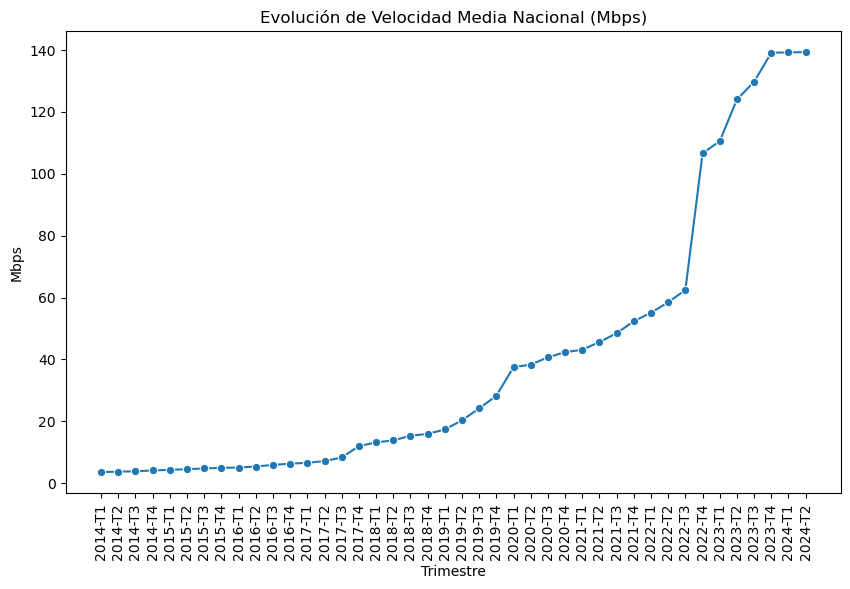

In [408]:
# Crear columna de 'periodo' como combinación de año y trimestre.
totales_nacionales['periodo'] = (
    totales_nacionales['anio'].astype(str) + 
    '-T' + 
    totales_nacionales['trimestre'].astype(str)
)

# Ordenar los datos por 'periodo' basados en trimestres válidos
totales_nacionales['periodo'] = pd.Categorical(
    totales_nacionales['periodo'], 
    categories=trimestres_validos, 
    ordered=True
)
#totales_nacionales.sort_values('periodo', inplace=True)

# Línea temporal de velocidad media de bajada
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=totales_nacionales, 
    x='periodo', 
    y='mbps_media_de_bajada', 
    marker='o'
)
plt.title('Evolución de Velocidad Media Nacional (Mbps)')
plt.xlabel('Trimestre')
plt.ylabel('Mbps')
plt.xticks(rotation=90)
plt.show()


Se observa un aumento abrupto en la velocidad media de aproximadamente un 40% durante el tercer trimestre de 2022.

- Evolución de Accesos por Tecnología

Se grafica cómo evolucionan los accesos por tecnología a nivel nacional.

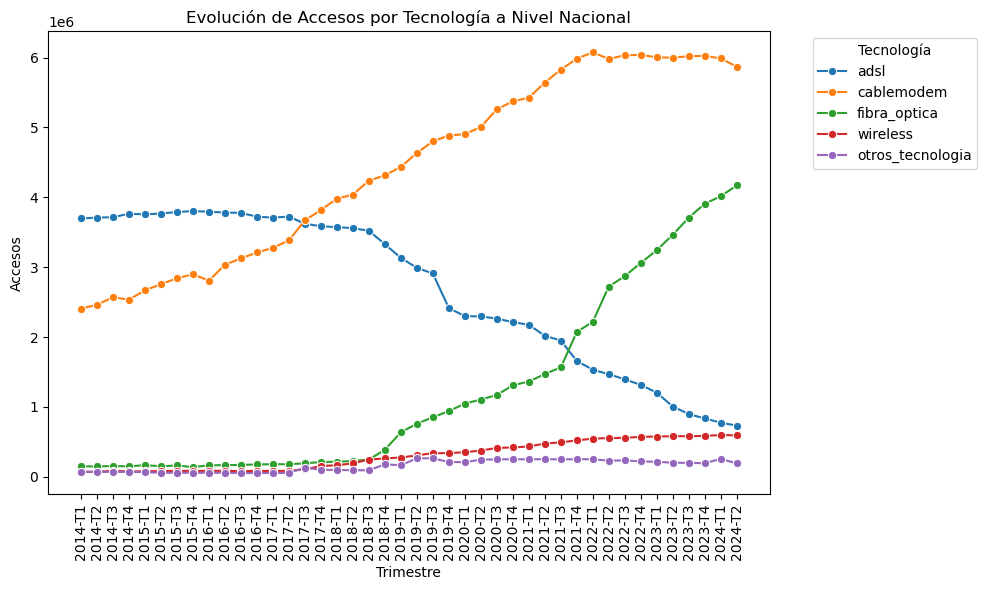

In [409]:
# Crear columna de 'periodo' para representar el trimestre como "Año-QTrimestre"
totales_nacionales['periodo'] = (
    totales_nacionales['anio'].astype(str) +
    '-T' +
    totales_nacionales['trimestre'].astype(str)
)

# Asegurar que 'periodo' esté alineado con los trimestres válidos
totales_nacionales['periodo'] = pd.Categorical(
    totales_nacionales['periodo'], 
    categories=trimestres_validos, 
    ordered=True
)
#totales_nacionales.sort_values('periodo', inplace=True)

# Preparar los datos para el gráfico
tech_columns = ['adsl', 'cablemodem', 'fibra_optica', 'wireless', 'otros_tecnologia']
tech_data = totales_nacionales.melt(
    id_vars=['periodo'],  # Usar 'periodo' como identificador
    value_vars=tech_columns, 
    var_name='tecnologia', 
    value_name='accesos'
)

# Graficar la evolución de accesos por tecnología
plt.figure(figsize=(10, 6))
sns.lineplot(data=tech_data, x='periodo', y='accesos', hue='tecnologia', marker='o')
plt.title('Evolución de Accesos por Tecnología a Nivel Nacional')
plt.xlabel('Trimestre')
plt.ylabel('Accesos')
plt.xticks(rotation=90)
plt.legend(title='Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ajustar automáticamente los espacios
plt.show()


El cablemódem predomina sobre las demás tecnologías hasta el segundo trimestre de 2024, mostrando un crecimiento sostenido hasta estancarse en el tercer trimestre de 2021. Por su parte, el ADSL experimenta una caída casi constante desde aproximadamente el segundo trimestre de 2018, mientras que la fibra óptica ha mantenido un crecimiento casi constante hasta la actualidad. Se puede afirmar que ha habido un recambio entre estas dos últimas tecnologías.

- Distribución de Accesos por Rango de Velocidad

Se crea un gráfico de barras apiladas para mostrar la cantidad de accesos según el rango de velocidad.

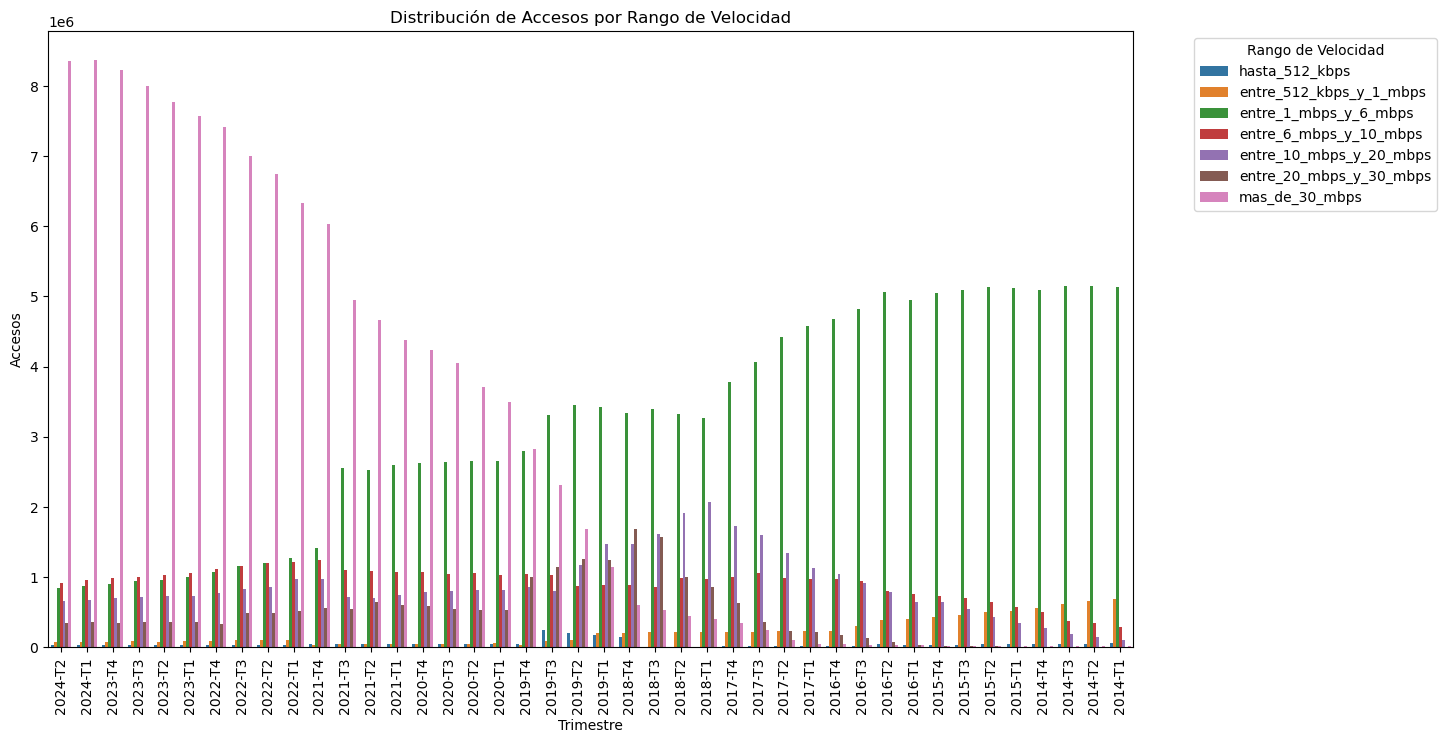

In [410]:

range_columns = [
    'hasta_512_kbps', 'entre_512_kbps_y_1_mbps', 
    'entre_1_mbps_y_6_mbps', 'entre_6_mbps_y_10_mbps', 
    'entre_10_mbps_y_20_mbps', 'entre_20_mbps_y_30_mbps', 'mas_de_30_mbps'
]
range_data = totales_nacionales.melt(
    id_vars=['anio', 'trimestre'], 
    value_vars=range_columns, 
    var_name='rango', # Proporción de accesos por rango de velocidad
    value_name='accesos'
)

# Crear una columna para trimestres completos
range_data['periodo'] = range_data['anio'].astype(str) + '-T' + range_data['trimestre'].astype(str)
range_data = range_data[range_data['periodo'].isin(trimestres_validos)]

plt.figure(figsize=(14, 8))
sns.barplot(
    data=range_data, 
    x='periodo', 
    y='accesos', 
    hue='rango'
)
plt.title('Distribución de Accesos por Rango de Velocidad')
plt.xlabel('Trimestre')
plt.ylabel('Accesos')
plt.xticks(rotation=90)
plt.legend(title='Rango de Velocidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Análisis de Ingresos Nacionales
- Unión con la Hoja de Ingresos

Se agregan los ingresos a totales_nacionales.

In [411]:
hoja15.head()

,anio,trimestre,ingresos_miles_de_pesos,periodo
0,2024,2,4.420322e+08,Abr-Jun 2024
1,2024,1,3.461990e+08,Ene-Mar 2024
2,2023,4,1.673760e+08,Oct-Dic 2023
3,2023,3,1.331066e+08,Jul-Sept 2023
4,2023,2,1.180603e+08,Jun-Mar 2023


In [412]:
print("\nValores únicos en columnas relevantes:")
for col in hoja15.columns:
    print(f"{col}: {hoja15[col].nunique()} valores únicos")


Valores únicos en columnas relevantes:
anio: 12 valores únicos
trimestre: 4 valores únicos
ingresos_miles_de_pesos: 42 valores únicos
periodo: 42 valores únicos


En la inspección general de todas las hojas, se observa que hoja15 tiene 12 valores únicos en la columna 'anio', a diferencia del resto de las hojas con las que se realiza el análisis a nivel provincial, que tienen 11. Se corregirá esta inconsistencia.

In [413]:
for column in ['anio']:
    print(f"Valores únicos en la columna {column}:")
    print(hoja15[column].unique())
    print("\n")


Valores únicos en la columna anio:
[2024 2023 2033 2022 2021 2020 2019 2018 2017 2016 2015 2014]




In [414]:
print(f"Valores únicos en la columna 'anio' y su cuenta:")
anio_counts = hoja15['anio'].value_counts()
print(anio_counts)


Valores únicos en la columna 'anio' y su cuenta:
anio
2022    4
2021    4
2020    4
2019    4
2018    4
2017    4
2016    4
2015    4
2014    4
2023    3
2024    2
2033    1
Name: count, dtype: int64


- Se reemplaza el valor 2033 por 2023 (error de tipeo).

In [415]:
hoja15['anio'] = hoja15['anio'].replace(2033, 2023)

print("\nValores únicos después de reemplazar 2033 por 2023:")
print(hoja15['anio'].unique())



Valores únicos después de reemplazar 2033 por 2023:
[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]


Se une hoja15 (ingresos) al DataFrame totales_nacionales

In [416]:
totales_con_ingresos = totales_nacionales.merge(hoja15, on=['anio', 'trimestre'], how='inner')

In [417]:
totales_con_ingresos.head()

,anio,trimestre,adsl,cablemodem,fibra_optica,wireless,otros_tecnologia,total_tecnologia,periodo_x,mbps_media_de_bajada,...,entre_512_kbps_y_1_mbps,entre_1_mbps_y_6_mbps,entre_6_mbps_y_10_mbps,entre_10_mbps_y_20_mbps,entre_20_mbps_y_30_mbps,mas_de_30_mbps,otros_rangos,total_rangos,ingresos_miles_de_pesos,periodo_y
0,2024,2,733491,5867504,4169958,593197,191957,11556107,2024-T2,139.25,...,67024,840200,911374,662649,348253,8357088,341368,11556107,4.420322e+08,Abr-Jun 2024
1,2024,1,774475,5986957,4015101,598682,257941,11633156,2024-T1,139.15,...,69355,866152,950930,672155,353896,8363694,328173,11633156,3.461990e+08,Ene-Mar 2024
2,2023,4,836390,6022532,3908183,585760,194796,11547661,2023-T4,139.04,...,71742,900253,978108,697232,350290,8224736,295592,11547661,1.673760e+08,Oct-Dic 2023
3,2023,3,897895,6018832,3708718,581436,200027,11406908,2023-T3,129.67,...,80609,945608,998725,720084,350918,8003269,277421,11406908,1.331066e+08,Jul-Sept 2023
4,2023,2,1006509,5997149,3463988,581823,202428,11251897,2023-T2,123.95,...,79405,963510,1028250,734125,364730,7775095,275955,11251897,1.180603e+08,Jun-Mar 2023


In [418]:
totales_con_ingresos = totales_con_ingresos.drop('periodo_y', axis=1)


- Evolución de Ingresos

Visualizamos los ingresos en función del tiempo.

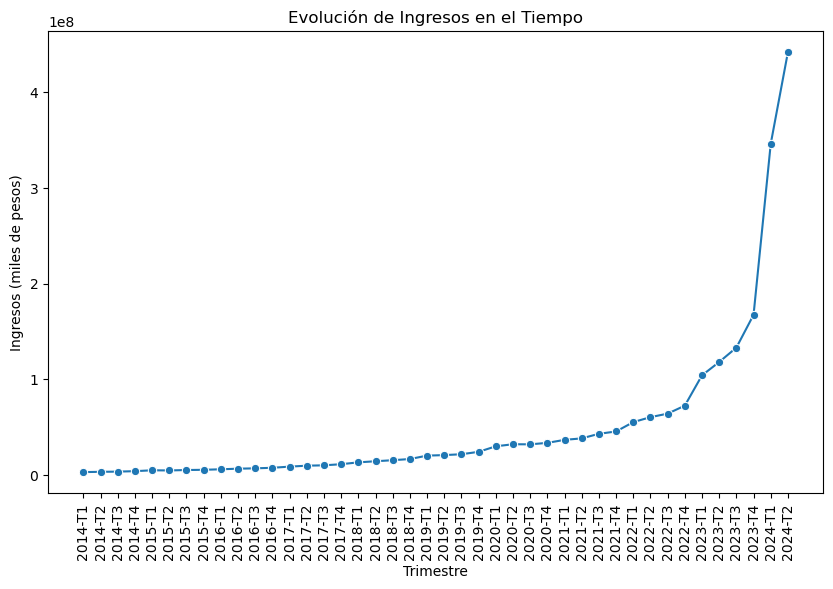

In [419]:
# Crear una columna para trimestres completos en el DataFrame `totales_con_ingresos`
totales_con_ingresos['periodo'] = (
    totales_con_ingresos['anio'].astype(str) + '-T' + totales_con_ingresos['trimestre'].astype(str)
)

# Filtrar solo los trimestres válidos
totales_con_ingresos = totales_con_ingresos[totales_con_ingresos['periodo'].isin(trimestres_validos)]

# Convertir la columna 'periodo' en una categoría ordenada para asegurar el orden correcto en el gráfico
totales_con_ingresos['periodo'] = pd.Categorical(
    totales_con_ingresos['periodo'],
    categories=trimestres_validos,
    ordered=True
)

# Línea temporal de ingresos
plt.figure(figsize=(10, 6))
sns.lineplot(data=totales_con_ingresos, x='periodo', y='ingresos_miles_de_pesos', marker='o')
plt.title('Evolución de Ingresos en el Tiempo')
plt.xlabel('Trimestre')
plt.ylabel('Ingresos (miles de pesos)')
plt.xticks(rotation=90)
plt.show()


Se observa un aumento más pronunciado en los ingresos a partir del cuarto trimestre de 2022. Esto puede explicarse por varios factores, considerando el contexto económico argentino, como son la inflación, la devaluación del peso, cómo estos afectan el consumo, aumento en el costo del servicio o incremento en la demanda.

- Correlación entre Ingresos y Accesos

Estudiamos cómo los ingresos están relacionados con los accesos por tecnología.

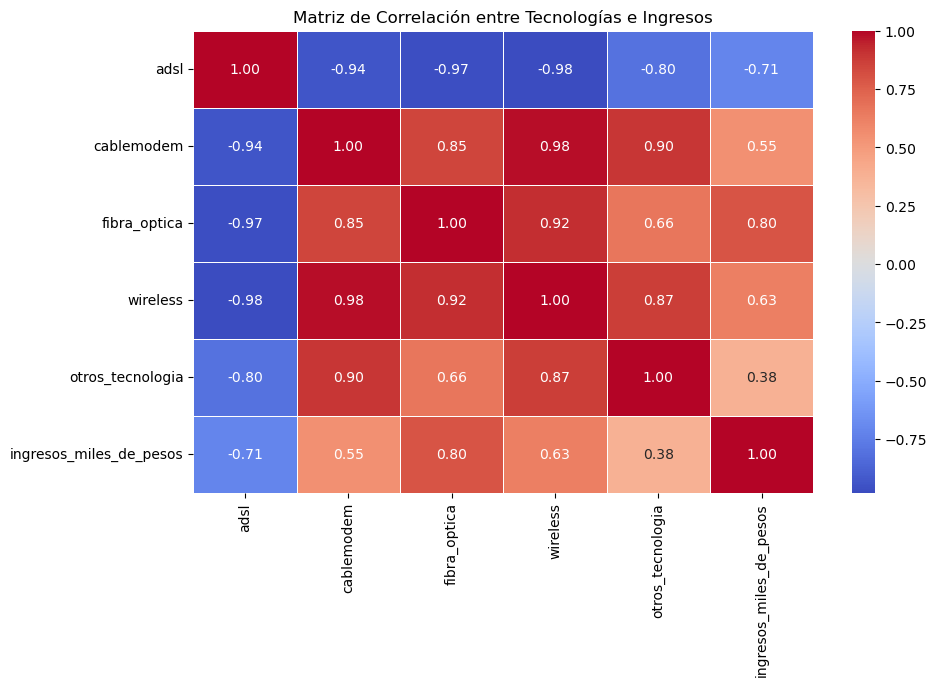

In [420]:
totales_con_ingresos['periodo'] = (
    totales_con_ingresos['anio'].astype(str) + '-Q' + totales_con_ingresos['trimestre'].astype(str)
)

columnas_interes = ['adsl', 'cablemodem', 'fibra_optica', 'wireless', 'otros_tecnologia', 'ingresos_miles_de_pesos']
data_correlacion = totales_con_ingresos[columnas_interes]

# Calcular la matriz de correlación
correlation_matrix = data_correlacion.corr()

# Graficar el heatmap de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title('Matriz de Correlación entre Tecnologías e Ingresos')
plt.show()

La matriz de correlación revela que la tecnología de fibra óptica presenta una correlación muy alta con los ingresos, seguida por el cablemódem, mientras que el ADSL muestra una correlación negativa con los ingresos. Este patrón podría reflejar la creciente relevancia de las tecnologías de fibra óptica y cablemódem en la generación de ingresos, mientras que el descenso en la correlación con el ADSL podría indicar una disminución en su contribución a los ingresos totales.

## Análisis nacional-Comparativo de Penetración

Se unen los datos de penetración(hoja10) a la tabla nacional.

In [421]:
hoja10.head()

,anio,trimestre,accesos_por_cada_100_hogares,accesos_por_cada_100_hab,periodo
0,2024,2,78.13,24.57,Abr-Jun 2024
1,2024,1,78.89,24.79,Ene-Mar 2024
2,2023,4,78.56,24.66,Oct-Dic 2023
3,2023,3,77.84,24.41,Jul-Sept 2023
4,2023,2,77.02,24.14,Abr-Jun 2023


In [422]:
hoja10 = hoja10.drop('periodo', axis=1)


In [423]:
analisis_nacional = totales_con_ingresos.merge(hoja10, on=['anio', 'trimestre'], how='inner')

In [424]:
analisis_nacional.head()

,anio,trimestre,adsl,cablemodem,fibra_optica,wireless,otros_tecnologia,total_tecnologia,periodo_x,mbps_media_de_bajada,...,entre_6_mbps_y_10_mbps,entre_10_mbps_y_20_mbps,entre_20_mbps_y_30_mbps,mas_de_30_mbps,otros_rangos,total_rangos,ingresos_miles_de_pesos,periodo,accesos_por_cada_100_hogares,accesos_por_cada_100_hab
0,2024,2,733491,5867504,4169958,593197,191957,11556107,2024-T2,139.25,...,911374,662649,348253,8357088,341368,11556107,4.420322e+08,2024-Q2,78.13,24.57
1,2024,1,774475,5986957,4015101,598682,257941,11633156,2024-T1,139.15,...,950930,672155,353896,8363694,328173,11633156,3.461990e+08,2024-Q1,78.89,24.79
2,2023,4,836390,6022532,3908183,585760,194796,11547661,2023-T4,139.04,...,978108,697232,350290,8224736,295592,11547661,1.673760e+08,2023-Q4,78.56,24.66
3,2023,3,897895,6018832,3708718,581436,200027,11406908,2023-T3,129.67,...,998725,720084,350918,8003269,277421,11406908,1.331066e+08,2023-Q3,77.84,24.41
4,2023,2,1006509,5997149,3463988,581823,202428,11251897,2023-T2,123.95,...,1028250,734125,364730,7775095,275955,11251897,1.180603e+08,2023-Q2,77.02,24.14


- Comparación entre Penetración en Hogares y Población

Graficamos cómo evolucionan las métricas de penetración.

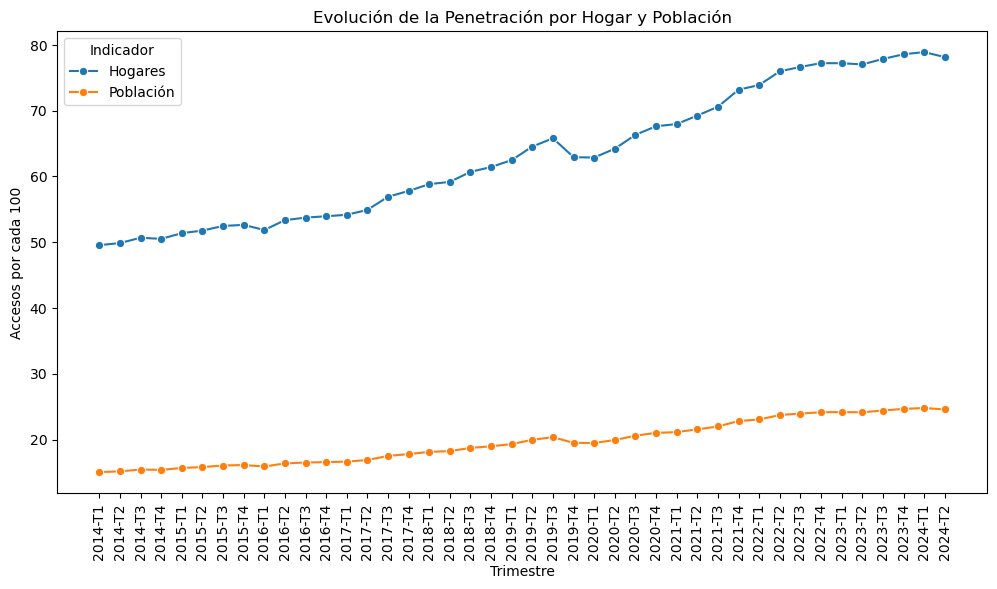

In [425]:
analisis_nacional['periodo'] = (
    analisis_nacional['anio'].astype(str) + '-T' + analisis_nacional['trimestre'].astype(str)
)
analisis_nacional = analisis_nacional[analisis_nacional['periodo'].isin(trimestres_validos)]

# Convertir la columna 'periodo' en una categoría ordenada para asegurar el orden correcto en el gráfico
analisis_nacional['periodo'] = pd.Categorical(
    analisis_nacional['periodo'],
    categories=trimestres_validos,
    ordered=True
)

# Comparación de penetración en hogares y población
plt.figure(figsize=(12, 6))
sns.lineplot(data=analisis_nacional, x='periodo', y='accesos_por_cada_100_hogares', label='Hogares', marker='o')
sns.lineplot(data=analisis_nacional, x='periodo', y='accesos_por_cada_100_hab', label='Población', marker='o')
plt.title('Evolución de la Penetración por Hogar y Población')
plt.xlabel('Trimestre')
plt.ylabel('Accesos por cada 100')
plt.xticks(rotation=90)
plt.legend(title='Indicador')
plt.show()


Tanto la penetración en hogares como en población muestran una tendencia creciente a lo largo del tiempo, lo que sugiere una mejora en el acceso o adopción de la tecnología correspondiente.

Aunque la penetración en población tiene valores menores, presenta un crecimiento continuo, aunque a un ritmo más lento que los hogares.

En los trimestres más recientes, parece haber una estabilización o crecimiento más lento, especialmente en los hogares.

El DataFrame 'analisis_nacional' se guarda en un archivo .csv para visualizacion interactiva.

In [426]:
analisis_nacional.to_csv('analisis_nacional.csv', index=False)

En síntesis, se observa un aumento constante en la velocidad promedio nacional, aunque con menor crecimiento en trimestres recientes.

La fibra óptica y el cablemódem lideran los accesos, mientras que ADSL muestra un declive.

Existe una correlación positiva entre el aumento de accesos y los ingresos, particularmente con tecnologías como la fibra óptica.

La penetración en hogares supera a la de la población, lo que sugiere una oportunidad de expansión en zonas rurales o menos pobladas.

*Recomendaciones:*

Enfocar inversiones en tecnologías de alta velocidad como fibra óptica.
Diseñar estrategias específicas para mejorar la penetración en segmentos con menor acceso.

# **2. Análisis a nivel provincial**

Se considerarán las hojas :
## - hoja7 : accesos_por_tecnologia
## - hoja8 : penetracion_poblacion
## - hoja9 : penetracion_hogares
## - hoja12 : accesos_por_rangos

Las hojas mencionadas anteriormente se guardan en DataFrames.

In [427]:
hoja2 = hojas_data['velocidad_sin_rangos']
hoja7 = hojas_data['accesos_por_tecnologia']
hoja8 = hojas_data['penetracion_poblacion']
hoja9 = hojas_data['penetracion_hogares']
hoja12 = hojas_data['accesos_por_rangos']

A partir de la inspección de losdatos realizados anteriormente, se realizarán las transformaciones necesarias para unir las tablas mencionadas utilizando como claves las columnas 'anio', 'trimestre' y 'provincia'. Esto permitirá integrar los accesos por tecnología, velocidad, tipo de conexión y penetración.

In [428]:
hoja7.reset_index(drop=True, inplace=True)
hoja8.reset_index(drop=True, inplace=True)
hoja9.reset_index(drop=True, inplace=True)
hoja12.reset_index(drop=True, inplace=True)

- **hoja7**

Tratamiento de valores nulos.

In [429]:
filas_nulas_7 = hoja7[hoja7.isnull().any(axis=1)]
print(filas_nulas_7)

     anio                                          trimestre provincia  adsl  \
1007  NaN                                                NaN       NaN   NaN   
1008    *  Los datos provinciales no coinciden a nivel na...       NaN   NaN   

      cablemodem  fibra_optica  wireless  otros  total  
1007         NaN           NaN       NaN    NaN    NaN  
1008         NaN           NaN       NaN    NaN    NaN  


In [430]:
hoja7.dropna(inplace=True)

In [431]:
filas_nulas_7 = hoja7[hoja7.isnull().any(axis=1)]
print(filas_nulas_7)

Empty DataFrame
Columns: [anio, trimestre, provincia, adsl, cablemodem, fibra_optica, wireless, otros, total]
Index: []


- Se inspecciona con mayor profundidad los posibles errores en los datos de hoja7. 

En el análisis general, esta tabla tiene mas valores únicos que las tablas con las que se desea hacer la fusión. Se imprimen los tipos y los valores únicos de las columnas 'anio' y 'trimestre'.

In [432]:
for column in ['anio']:
    print(f"Valores únicos en la columna {column}:")
    print(hoja7[column].unique())
    print("\n")
print(f"Valores únicos en la columna 'anio' y su cuenta:")
anio_counts = hoja7['anio'].value_counts()
print(anio_counts)

Valores únicos en la columna anio:
[2024 2023 2022 2021 2020 2019 '2019 *' 2018 2017 2016 2015 2014]


Valores únicos en la columna 'anio' y su cuenta:
anio
2023      96
2022      96
2021      96
2020      96
2018      96
2017      96
2016      96
2015      96
2014      96
2019 *    72
2024      47
2019      24
Name: count, dtype: int64


Se eliminan los asteriscos que acompañan a algunos valores de las columnas 'anio' y 'trimestre'.

In [433]:
hoja7['anio'] = hoja7['anio'].astype(str).str.extract(r'(\d+)').astype(int)

hoja7['trimestre'] = hoja7['trimestre'].astype(str).str.extract(r'(\d+)').astype(int)

hoja7[['anio', 'trimestre']].drop_duplicates()

,anio,trimestre
0,2024,2
24,2024,1
47,2023,4
71,2023,3
95,2023,2
119,2023,1
143,2022,4
167,2022,3
191,2022,2
215,2022,1


- Se imprimen los valores únicos y su suma.

In [434]:
for column in ['anio', 'trimestre']:
    print(f"Valores únicos en la columna '{column}':")
    print(hoja7[column].unique())
    print(f"Cuenta de cada valor único en '{column}':")
    print(hoja7[column].value_counts())
    print("\n")

Valores únicos en la columna 'anio':
[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
Cuenta de cada valor único en 'anio':
anio
2023    96
2022    96
2021    96
2020    96
2019    96
2018    96
2017    96
2016    96
2015    96
2014    96
2024    47
Name: count, dtype: int64


Valores únicos en la columna 'trimestre':
[2 1 4 3]
Cuenta de cada valor único en 'trimestre':
trimestre
2    264
1    263
4    240
3    240
Name: count, dtype: int64




Se identificó la falta de datos para la Provincia de Buenos Aires en el trimestre 1 de 2024. Se agregará este valor considerando el promedio de valores del trimestre anterior (triemstre 4 de 2023) y del trimestre siguiente(2 de 2024).
Se crea una columna fecha en formato datetime en hoja7.

In [435]:
hoja7['fecha'] = pd.to_datetime(
    hoja7['anio'].astype(str) + '-' + ((hoja7['trimestre'] * 3 - 2).astype(str)) + '-01',
    errors='coerce'
)

In [436]:
# Filtrar los datos y hacer copias explícitas
t4_2023 = hoja7[(hoja7["anio"] == 2023) & (hoja7["trimestre"] == 4) & (hoja7["provincia"] == "Buenos Aires")].copy()
t2_2024 = hoja7[(hoja7["anio"] == 2024) & (hoja7["trimestre"] == 2) & (hoja7["provincia"] == "Buenos Aires")].copy()

# Asegurarnos de que las columnas relevantes son numéricas
columns_to_average = ["adsl", "cablemodem", "fibra_optica", "wireless", "otros", "total"]
t4_2023[columns_to_average] = t4_2023[columns_to_average].astype(float)
t2_2024[columns_to_average] = t2_2024[columns_to_average].astype(float)

# Calcular el promedio
promedio = (t4_2023.iloc[0][columns_to_average] + t2_2024.iloc[0][columns_to_average]) / 2

# Crear la nueva fila
new_row = {
    "anio": 2024,
    "trimestre": 1,
    "provincia": "Buenos Aires",
    **promedio.to_dict(),
    "fecha": pd.Timestamp("2024-01-01"),
}

# Agregar la nueva fila al DataFrame
hoja7 = pd.concat([hoja7, pd.DataFrame([new_row])], ignore_index=True)

# Ordenar por fecha en orden descendente
hoja7 = hoja7.sort_values(by="fecha", ascending=False).reset_index(drop=True)

In [437]:
hoja7.head()

,anio,trimestre,provincia,adsl,cablemodem,fibra_optica,wireless,otros,total,fecha
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0,2024-04-01
1,2024,2,Misiones,20868.0,76427.0,87389.0,14968.0,6902.0,206554.0,2024-04-01
2,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0,2024-04-01
3,2024,2,Tucumán,27968.0,20806.0,213753.0,3869.0,518.0,266914.0,2024-04-01
4,2024,2,Tierra Del Fuego,9357.0,47859.0,3684.0,177.0,332.0,61409.0,2024-04-01


Se renombran las columnas cuyos nombres coinciden con las columnas de las tablas que se unirán.

In [438]:
hoja7 = hoja7.rename(columns={
    'otros' : 'otros_tecnologia',
    'total': 'total_tecnologia'
})

hoja8 y hoja9

In [439]:
for column in ['anio', 'trimestre']:
    print(f"Valores únicos en la columna '{column}':")
    print(hoja8[column].unique())
    print(f"Cuenta de cada valor único en '{column}':")
    print(hoja8[column].value_counts())
    print("\n")

Valores únicos en la columna 'anio':
[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
Cuenta de cada valor único en 'anio':
anio
2023    96
2022    96
2021    96
2020    96
2019    96
2018    96
2017    96
2016    96
2015    96
2014    88
2024    48
Name: count, dtype: int64


Valores únicos en la columna 'trimestre':
[2 1 4 3]
Cuenta de cada valor único en 'trimestre':
trimestre
2    264
1    256
4    240
3    240
Name: count, dtype: int64




In [440]:
for column in ['anio', 'trimestre']:
    print(f"Valores únicos en la columna '{column}':")
    print(hoja9[column].unique())
    print(f"Cuenta de cada valor único en '{column}':")
    print(hoja9[column].value_counts())
    print("\n")

Valores únicos en la columna 'anio':
[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
Cuenta de cada valor único en 'anio':
anio
2023    96
2022    96
2021    96
2020    96
2019    96
2018    96
2017    96
2016    96
2015    96
2014    88
2024    48
Name: count, dtype: int64


Valores únicos en la columna 'trimestre':
[2 1 4 3]
Cuenta de cada valor único en 'trimestre':
trimestre
2    264
1    256
4    240
3    240
Name: count, dtype: int64




hoja12

Se renombran las columnas cuyos nombres coinciden con las columnas de las tablas que se unirán.
Se asegura que los tipos dde datos sean los adecuados y que no se tengan valores nulos.

In [441]:
# Imprimir valores únicos y su cuenta para 'anio' y 'trimestre'
for column in ['anio', 'trimestre']:
    print(f"Valores únicos en la columna '{column}':")
    print(hoja12[column].unique())
    print(f"Cuenta de cada valor único en '{column}':")
    print(hoja12[column].value_counts())
    print("\n")

Valores únicos en la columna 'anio':
[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
Cuenta de cada valor único en 'anio':
anio
2022    96
2021    96
2020    96
2019    96
2018    96
2017    96
2016    96
2015    96
2014    88
2024    72
2023    72
Name: count, dtype: int64


Valores únicos en la columna 'trimestre':
[2 1 4 3]
Cuenta de cada valor único en 'trimestre':
trimestre
2    264
1    256
4    240
3    240
Name: count, dtype: int64




Con estos datos de hoja12, mas la inspección de los años 2023 y 2024, se concluye que existe error de tipeo para los datos del trimestre 4 de 2024. Se agregarán al año 2023, que tiene datos faltantes correspondientes al trimestre 4.

In [442]:
hoja12.loc[(hoja12["anio"] == 2024) & (hoja12["trimestre"] == 4), ["anio", "trimestre"]] = [2023, 4]

In [443]:
hoja12['fecha'] = pd.to_datetime(
    hoja12['anio'].astype(str) + '-' + ((hoja7['trimestre'] * 3 - 2).astype(str)) + '-01',
    errors='coerce'
)

In [444]:
hoja12 = hoja12.sort_values(by="fecha", ascending=False).reset_index(drop=True)

In [445]:
hoja12 = hoja12.rename(columns={
    'otros' : 'otros_rango',
    'total': 'total_rango'
})

In [446]:
hoja12.fillna({'otros': 0}, inplace=True)

hoja12['anio'] = hoja12['anio'].astype(int)
hoja12['trimestre'] = hoja12['trimestre'].astype(int)


Puesto que faltan datos de 2014 y no se consideran relevantes para el anális(por ser muy antiguos), se filtran los datos a partir de 2015 en todas las tablas que se fusionarán.

In [447]:
hoja7 = hoja7[hoja7['anio'] >= 2015]
hoja8 = hoja8[hoja8['anio'] >= 2015]
hoja9 = hoja9[hoja9['anio'] >= 2015]
hoja12 = hoja12[hoja12['anio'] >= 2015]

Merge

In [448]:
provincias_data = hoja7.merge(hoja8, on=['anio', 'trimestre', 'provincia'], how='left', suffixes=('', '_poblacion'))
provincias_data = provincias_data.merge(hoja9, on=['anio', 'trimestre', 'provincia'], how='left', suffixes=('', '_hogares'))
provincias_data = provincias_data.merge(hoja12, on=['anio', 'trimestre', 'provincia'], how='left', suffixes=('', '_rangos'))

In [449]:
provincias_data.head()

,anio,trimestre,provincia,adsl,cablemodem,fibra_optica,wireless,otros_tecnologia,total_tecnologia,fecha,...,hasta_512_kbps,_512_kbps__1_mbps,_1_mbps__6_mbps,_6_mbps__10_mbps,_10_mbps__20_mbps,_20_mbps__30_mbps,_30_mbps,otros_rango,total_rango,fecha_rangos
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0,2024-04-01,...,25287.0,23034.0,222627.0,221660.0,244528.0,106302.0,4020395.0,125547.0,4989380.0,2024-04-01
1,2024,2,Misiones,20868.0,76427.0,87389.0,14968.0,6902.0,206554.0,2024-04-01,...,51.0,3096.0,26173.0,26970.0,9290.0,4441.0,127506.0,9027.0,206554.0,2024-04-01
2,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0,2024-04-01,...,518.0,4122.0,24539.0,40296.0,33158.0,5633.0,1355333.0,0.0,1463599.0,2024-04-01
3,2024,2,Tucumán,27968.0,20806.0,213753.0,3869.0,518.0,266914.0,2024-04-01,...,40.0,808.0,14221.0,18593.0,22153.0,1515.0,209241.0,343.0,266914.0,2024-04-01
4,2024,2,Tierra Del Fuego,9357.0,47859.0,3684.0,177.0,332.0,61409.0,2024-04-01,...,22.0,834.0,10152.0,9645.0,10738.0,16737.0,6157.0,7124.0,61409.0,2024-04-01


In [450]:
provincias_data = provincias_data.drop(columns=['fecha_rangos'])

In [451]:
provincias_data.to_csv('provincias_data.csv', index=False, encoding='utf-8')

In [452]:
provincial_data = provincias_data.copy()

## Análisis de Comparación

- Penetración en Habitantes y Hogares por Provincia

Visualizaremos la penetración de internet tanto en habitantes como en hogares para identificar áreas con baja o alta penetración.

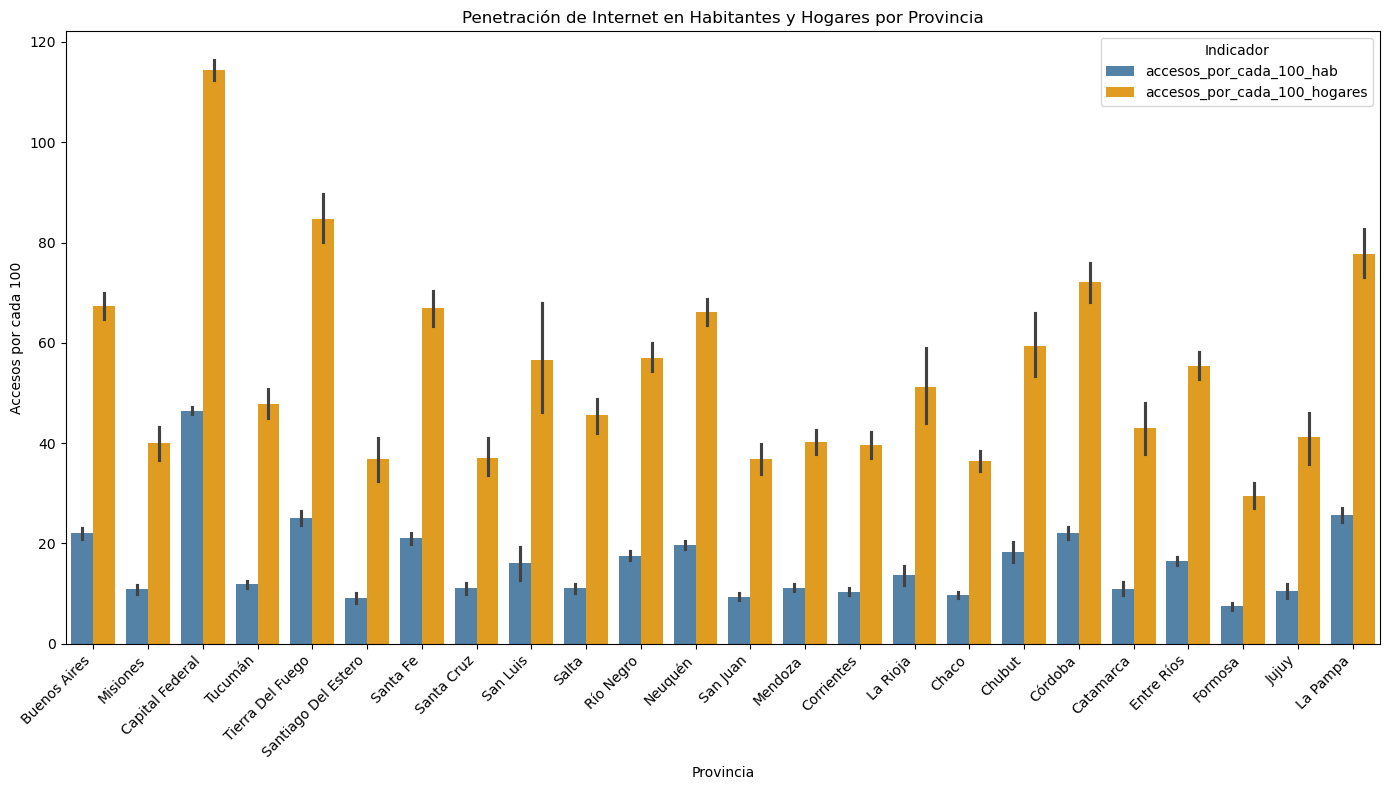

In [453]:
# Preparar los datos en formato long para el gráfico
penetracion_long = provincial_data.melt(
    id_vars=['provincia'], 
    value_vars=['accesos_por_cada_100_hab', 'accesos_por_cada_100_hogares'], 
    var_name='indicador', 
    value_name='accesos'
)

# Crear el gráfico de comparación
plt.figure(figsize=(14, 8))
sns.barplot(
    data=penetracion_long, 
    x='provincia', 
    y='accesos', 
    hue='indicador', 
    palette={'accesos_por_cada_100_hab': 'steelblue', 'accesos_por_cada_100_hogares': 'orange'}
)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100')
plt.title('Penetración de Internet en Habitantes y Hogares por Provincia')
plt.legend(title='Indicador')
plt.tight_layout()
plt.show()


La penetración de internet por cada 100 hogares (indicador amarillo) es significativamente más alta que la penetración por cada 100 habitantes (indicador azul) en todas las provincias.

Capital Federal tiene una de las tasas más altas de penetración en ambos indicadores, lo que refleja su alta conectividad en comparación con otras provincias. Este resultado es esperable dado el desarrollo tecnológico y económico de esta región.

Provincias como Santiago del Estero o Formosa tienen tasas de penetración por cada 100 habitantes y hogares mucho más bajas en comparación con regiones como Capital Federal o Tierra del Fuego.

Esto refleja posibles desigualdades en infraestructura tecnológica o acceso económico.
Tierra del Fuego, Capital Federal y Santa Cruz tienen los valores más altos en el indicador de accesos por cada 100 hogares, superando los 100 accesos en algunos casos. Esto indica que algunos hogares tienen múltiples conexiones.

Provincias como Córdoba, Neuquén y Santa Fe tienen una penetración considerable en ambos indicadores, pero no alcanzan los niveles de las provincias más conectadas.

El gráfico muestra un panorama claro de desigualdad en la conectividad de internet entre las provincias argentinas.

- Tipos de Tecnología por Provincia

Se graficarán las tecnologías por acceso para entender cómo se reparte la conectividad en las provincias.

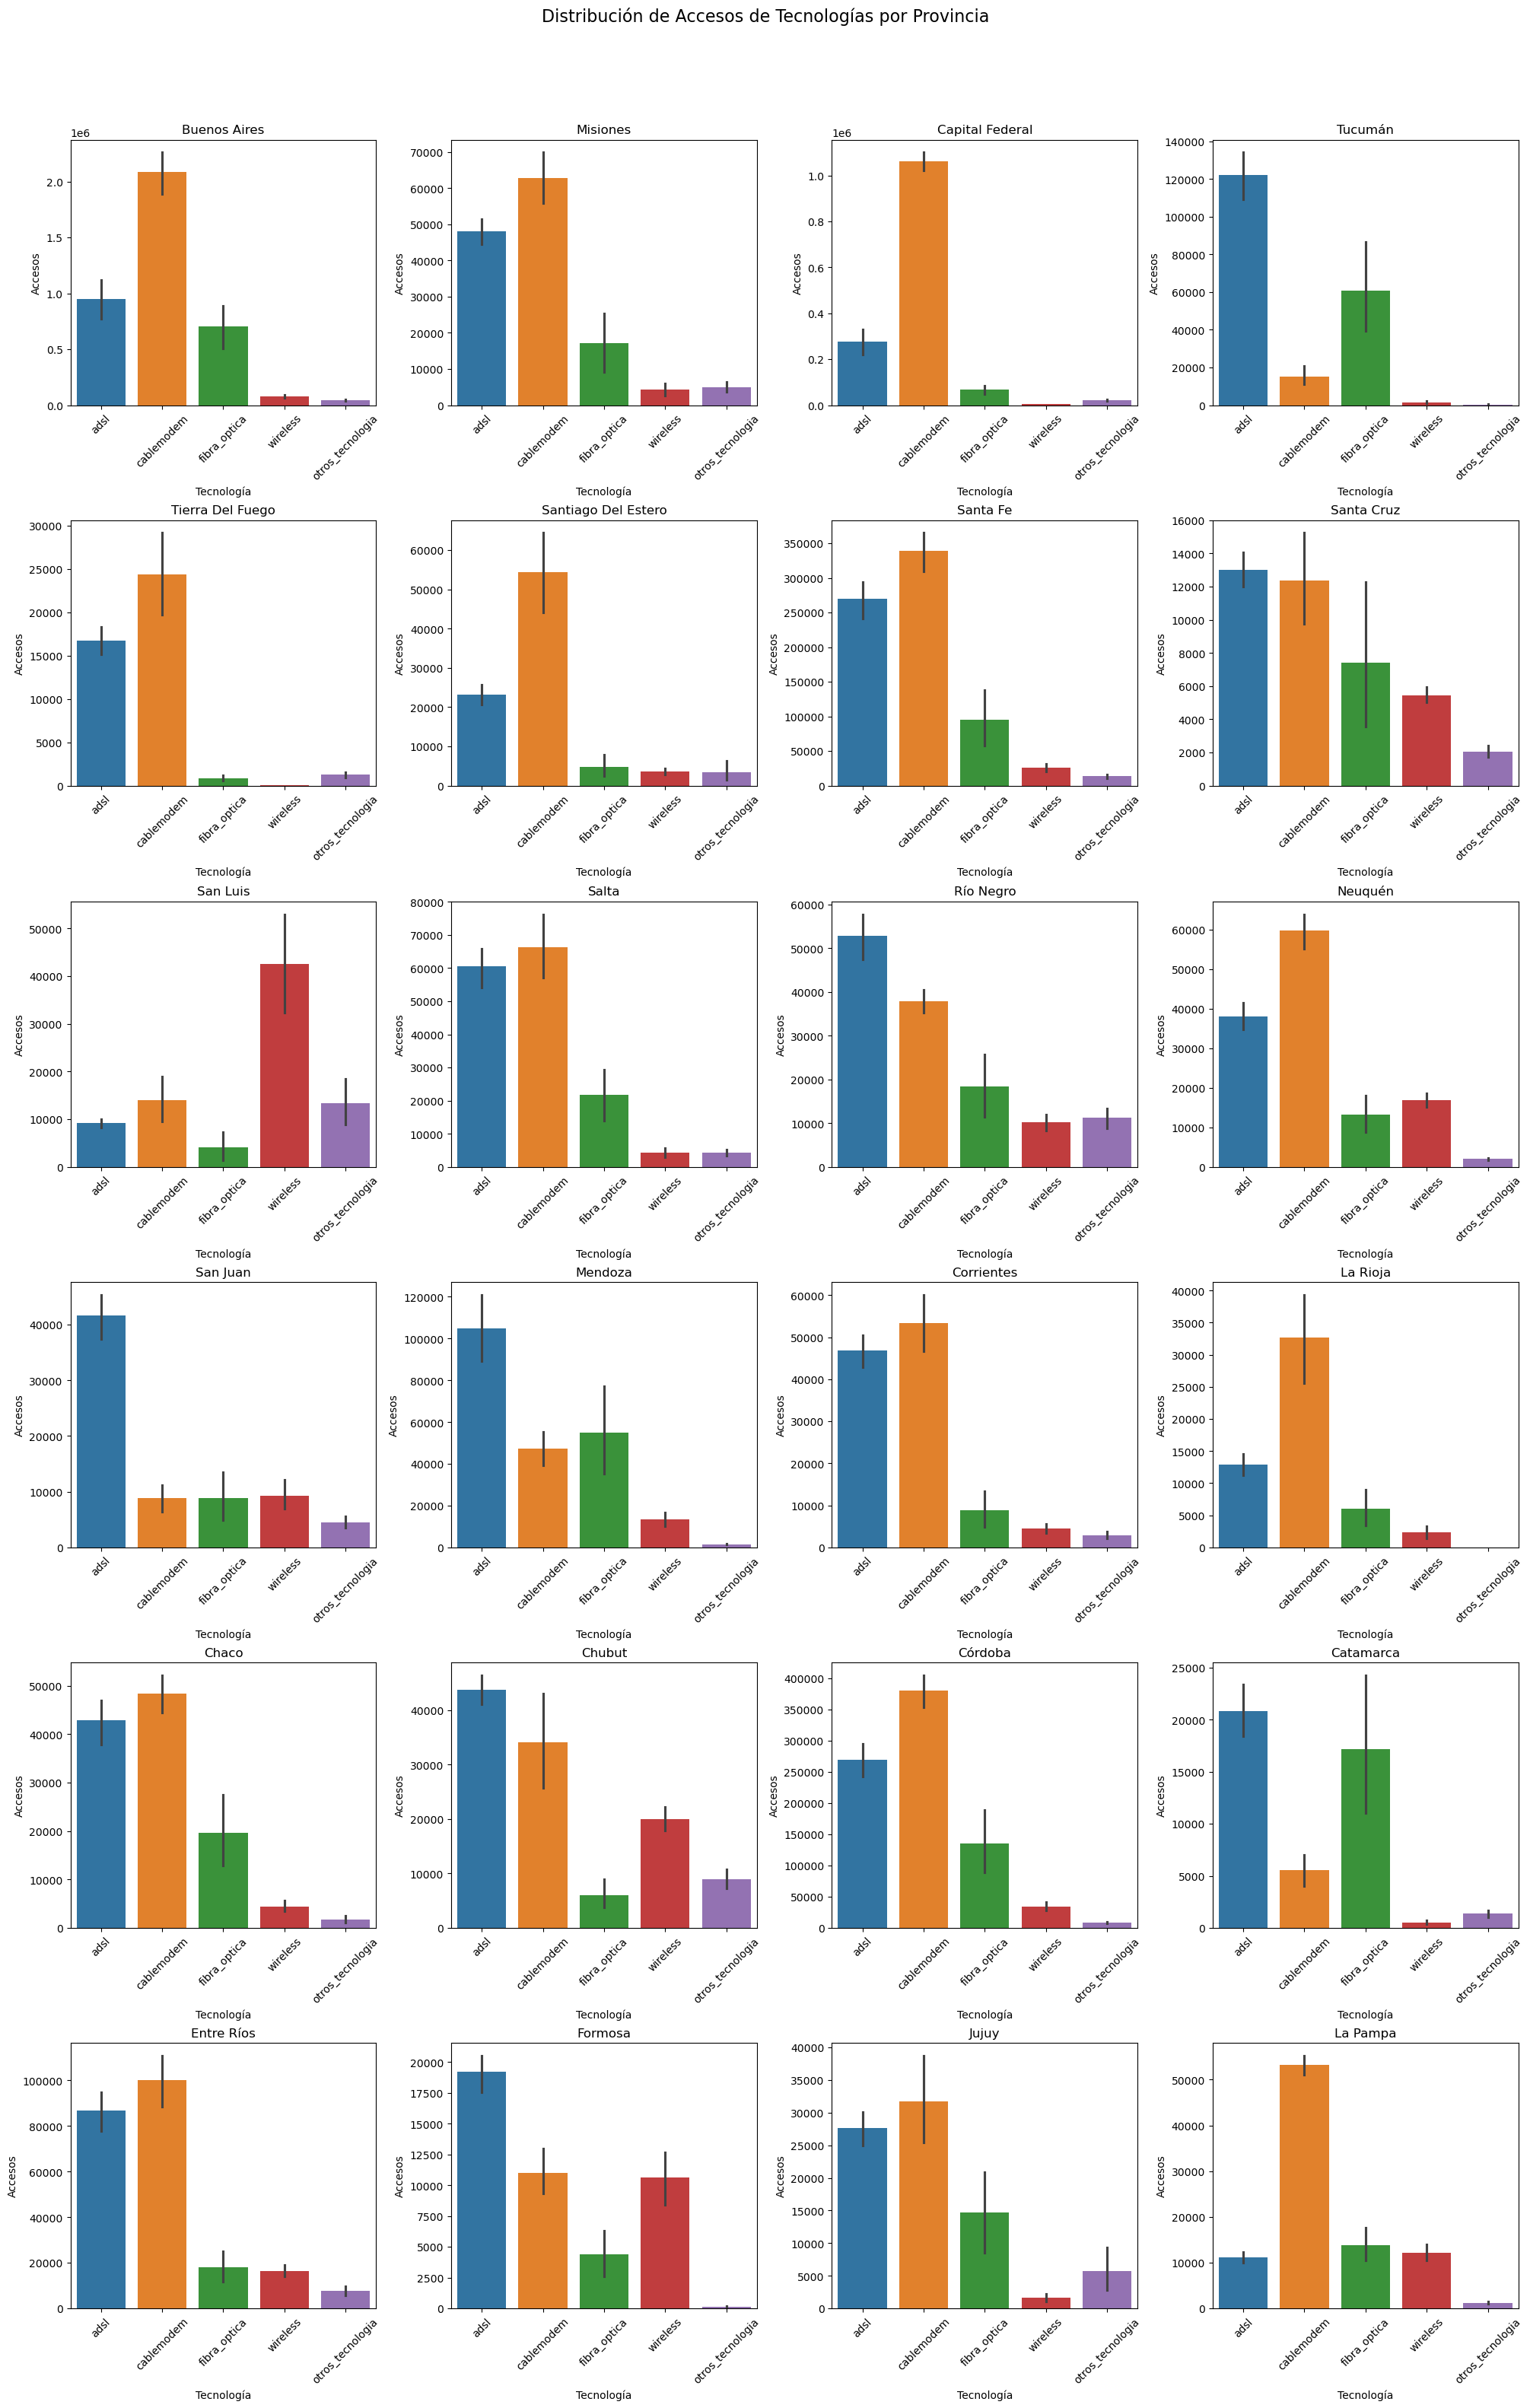

In [454]:
tech_columns = ['adsl', 'cablemodem', 'fibra_optica', 'wireless', 'otros_tecnologia']
tech_data = provincial_data.melt(
    id_vars=['provincia'], 
    value_vars=tech_columns, 
    var_name='tecnologia', 
    value_name='accesos'
)

provincias = tech_data['provincia'].unique()

nrows = (len(provincias) + 3) // 4  # Determinar el número de filas necesarias
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(20, nrows * 5), constrained_layout=True)
axes = axes.flatten()  # Aplanar los ejes para iterar fácilmente

# Iterar sobre cada provincia y graficar en un subplot
for i, provincia in enumerate(provincias):
    ax = axes[i]
    data = tech_data[tech_data['provincia'] == provincia]
    sns.barplot(
        data=data, 
        x='tecnologia', 
        y='accesos', 
        hue='tecnologia',  # Especificar el hue para diferenciar tecnologías
        ax=ax
    )
    ax.set_title(provincia)
    ax.set_xlabel('Tecnología')
    ax.set_ylabel('Accesos')
    ax.tick_params(axis='x', rotation=45)
    if ax.get_legend():  
        ax.get_legend().remove()

# Ocultar subplots vacíos si hay menos provincias que subplots
for j in range(len(provincias), len(axes)):
    fig.delaxes(axes[j])

# Título general
fig.suptitle('Distribución de Accesos de Tecnologías por Provincia', fontsize=16, y=1.05)
plt.show()


ADSL y Cablemodem son las tecnologías más comunes en la mayoría de las provincias. Sin embargo, la proporción de cada tecnología varía significativamente.
Cablemodem tiene una presencia destacada en provincias como Capital Federal, Buenos Aires, y Santa Fe.
ADSL domina en provincias como Santiago del Estero, Salta, y San Luis, lo que puede reflejar infraestructuras más antiguas o menos desarrolladas.

En provincias como Capital Federal, Buenos Aires, y Santa Fe, se observa un mayor uso de fibra óptica. Esto puede estar asociado con una mejor infraestructura y mayores niveles de inversión tecnológica en estas regiones.
En provincias menos desarrolladas, la fibra óptica aún representa una proporción menor del total de accesos, lo que muestra una desigualdad en la adopción de esta tecnología.

La inalámbrica y '0tras tecnologías' son muy escasas, lo que indica que falta infraestructura para implementarlas o son las preferidas por los usuarios. 
En algunas provincias (como Formosa y Chaco), estas tecnologías pueden ser ligeramente más relevantes, probablemente debido a la geografía o falta de infraestructura fija.

Provincias como Buenos Aires y Capital Federal tienen un volumen de accesos significativamente mayor, lo que es esperable dado el tamaño de su población y nivel de urbanización.
En contraste, provincias como La Rioja, Catamarca, y Formosa tienen un menor número total de accesos, lo que puede estar relacionado con menor densidad de población y menor desarrollo económico.

En provincias más desarrolladas (como Capital Federal y Buenos Aires), se observa una mayor diversificación hacia tecnologías modernas como la fibra óptica.
En provincias del norte (como Santiago del Estero, Salta, y Formosa), el acceso sigue estando dominado por tecnologías más antiguas como el ADSL.

Este gráfico refleja una fuerte desigualdad en el acceso y modernización de tecnologías de internet entre las provincias. Mientras que las provincias más desarrolladas están migrando hacia tecnologías como la fibra óptica, las menos desarrolladas aún dependen de tecnologías más antiguas como el ADSL. 

- Mapas de Calor

Penetración por Provincia

In [459]:
# Crear una columna para trimestres completos en el DataFrame `totales_con_ingresos`
provincial_data['periodo'] = (
    provincial_data['anio'].astype(str) + '-T' + provincial_data['trimestre'].astype(str)
)

# Filtrar solo los trimestres válidos
provincial_data = provincial_data[provincial_data['periodo'].isin(trimestres_validos)]

# Convertir la columna 'periodo' en una categoría ordenada para asegurar el orden correcto en el gráfico
provincial_data['periodo'] = pd.Categorical(
    provincial_data['periodo'],
    categories=trimestres_validos,
    ordered=True
)

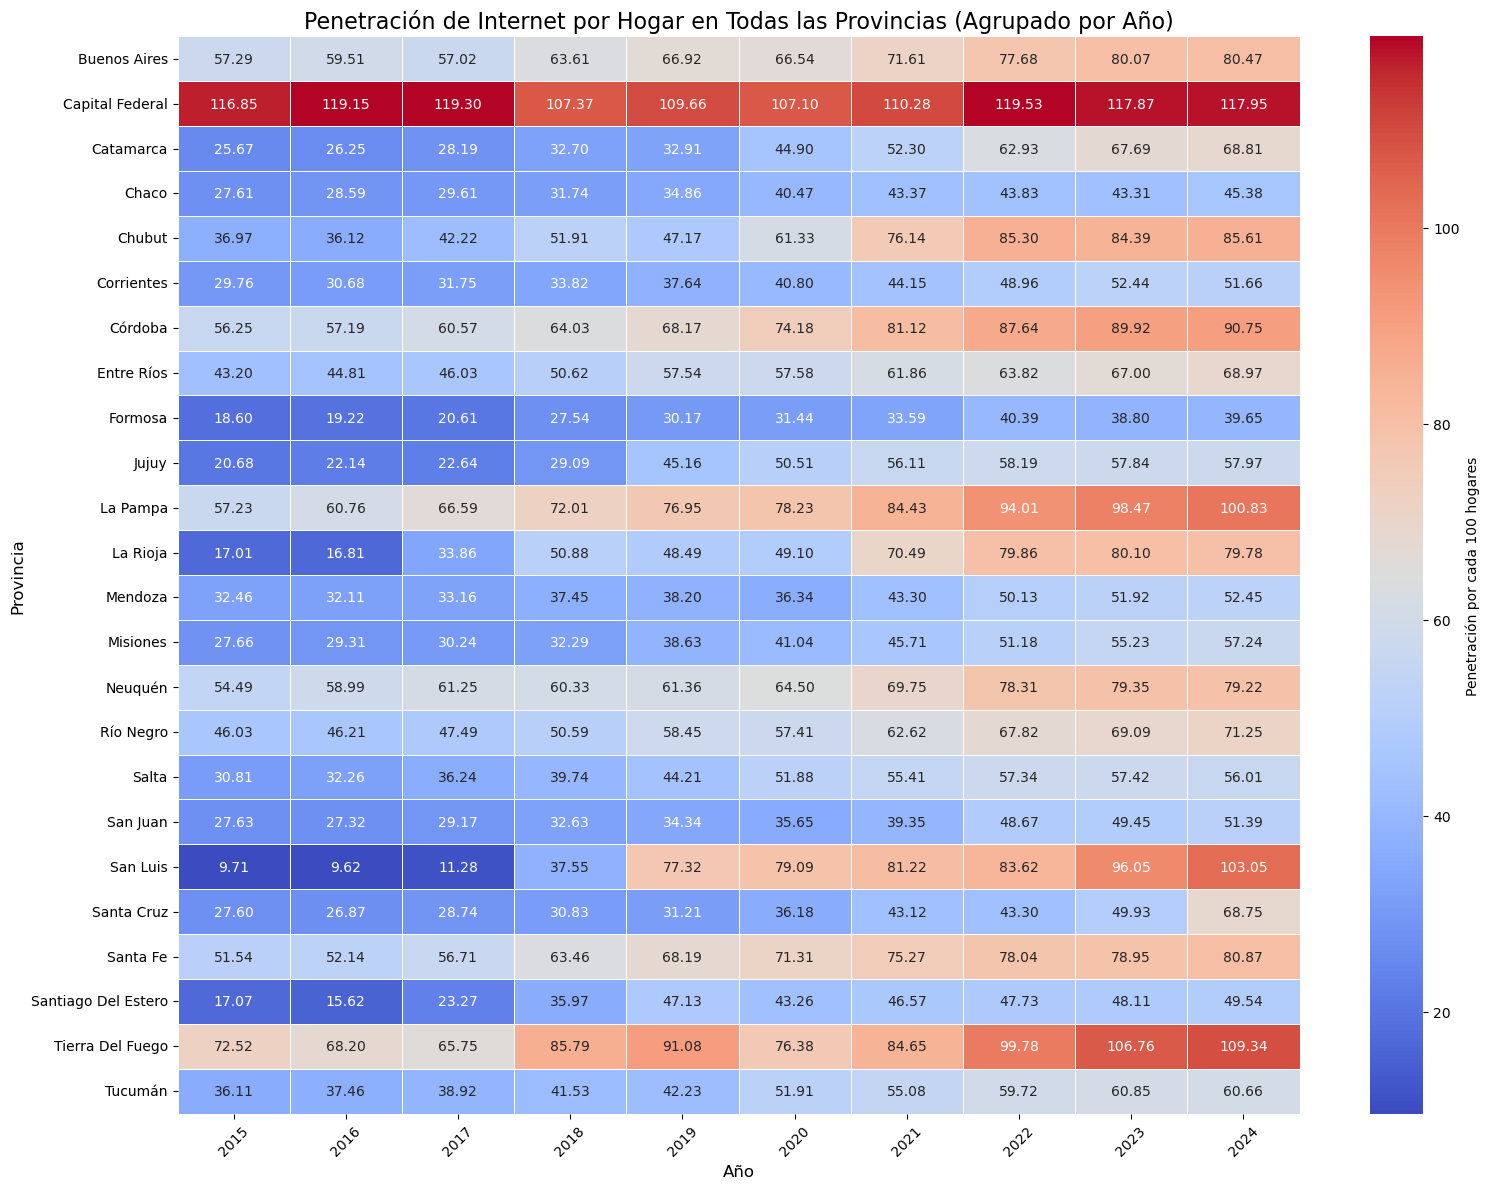

In [461]:
# Preparar datos (asumiendo que provincial_data ya está cargado)
# Crear columna 'anio' a partir del período
provincial_data['anio'] = provincial_data['periodo'].str[:4]

# Crear tabla pivote con datos anuales
heatmap_data_anual = provincial_data.pivot_table(
    values='accesos_por_cada_100_hogares',
    index='provincia',
    columns='anio',
    aggfunc='mean'
)

# Configurar el tamaño del gráfico
plt.figure(figsize=(16, 12))

# Crear el heatmap para todas las provincias
sns.heatmap(
    heatmap_data_anual,  # Cambiar a heatmap_data_norm si quieres valores normalizados
    annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, 
    cbar_kws={'label': 'Penetración por cada 100 hogares'}
)
plt.title('Penetración de Internet por Hogar en Todas las Provincias (Agrupado por Año)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Provincia', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Este gráfico muestra el aumento en la conectividad en Argentina, pero también destaca la necesidad de continuar cerrando las brechas digitales entre las provincias, especialmente en las que históricamente han estado rezagadas.

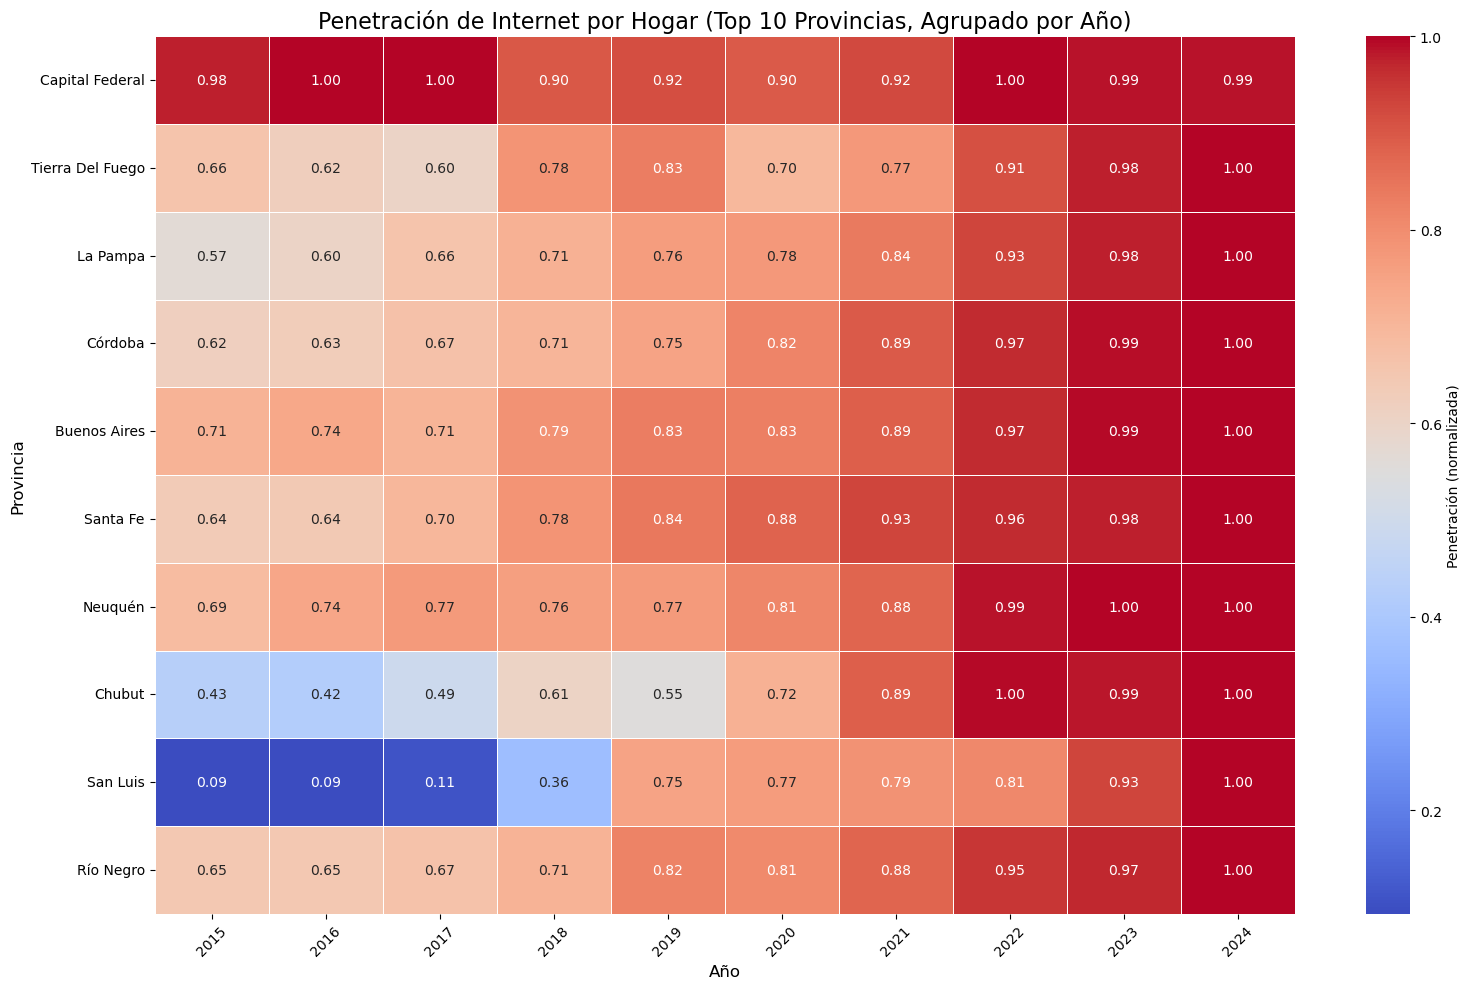

In [462]:
# Preparar datos (asumiendo que provincial_data ya está cargado)
# Crear columna 'anio' a partir del período
provincial_data['anio'] = provincial_data['periodo'].str[:4]

# Crear tabla pivote con datos anuales
heatmap_data_anual = provincial_data.pivot_table(
    values='accesos_por_cada_100_hogares',
    index='provincia',
    columns='anio',
    aggfunc='mean'
)

# Seleccionar las 10 provincias con mayor penetración promedio
provincias_top = heatmap_data_anual.mean(axis=1).nlargest(10).index
heatmap_data_top = heatmap_data_anual.loc[provincias_top]

# Normalizar valores dentro de cada provincia (opcional, comentar si no es necesario)
heatmap_data_top_norm = heatmap_data_top.div(heatmap_data_top.max(axis=1), axis=0)

# Configurar el tamaño del gráfico
plt.figure(figsize=(16, 10))

# Crear el heatmap
sns.heatmap(
    heatmap_data_top_norm,  # Cambiar a heatmap_data_top para valores absolutos
    annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, 
    cbar_kws={'label': 'Penetración (normalizada)'}
)
plt.title('Penetración de Internet por Hogar (Top 10 Provincias, Agrupado por Año)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Provincia', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Capital Federal ha tenido niveles consistentemente altos de penetración de internet por hogar a lo largo de los años, marcando la diferencia incluso con provincias con buenos niveles de conexión a lo largo de los años.

-  Distribución de Accesos por Rango de Velocidad

In [464]:
hoja4 = hojas_data['porcentaje_vel_por_prov']

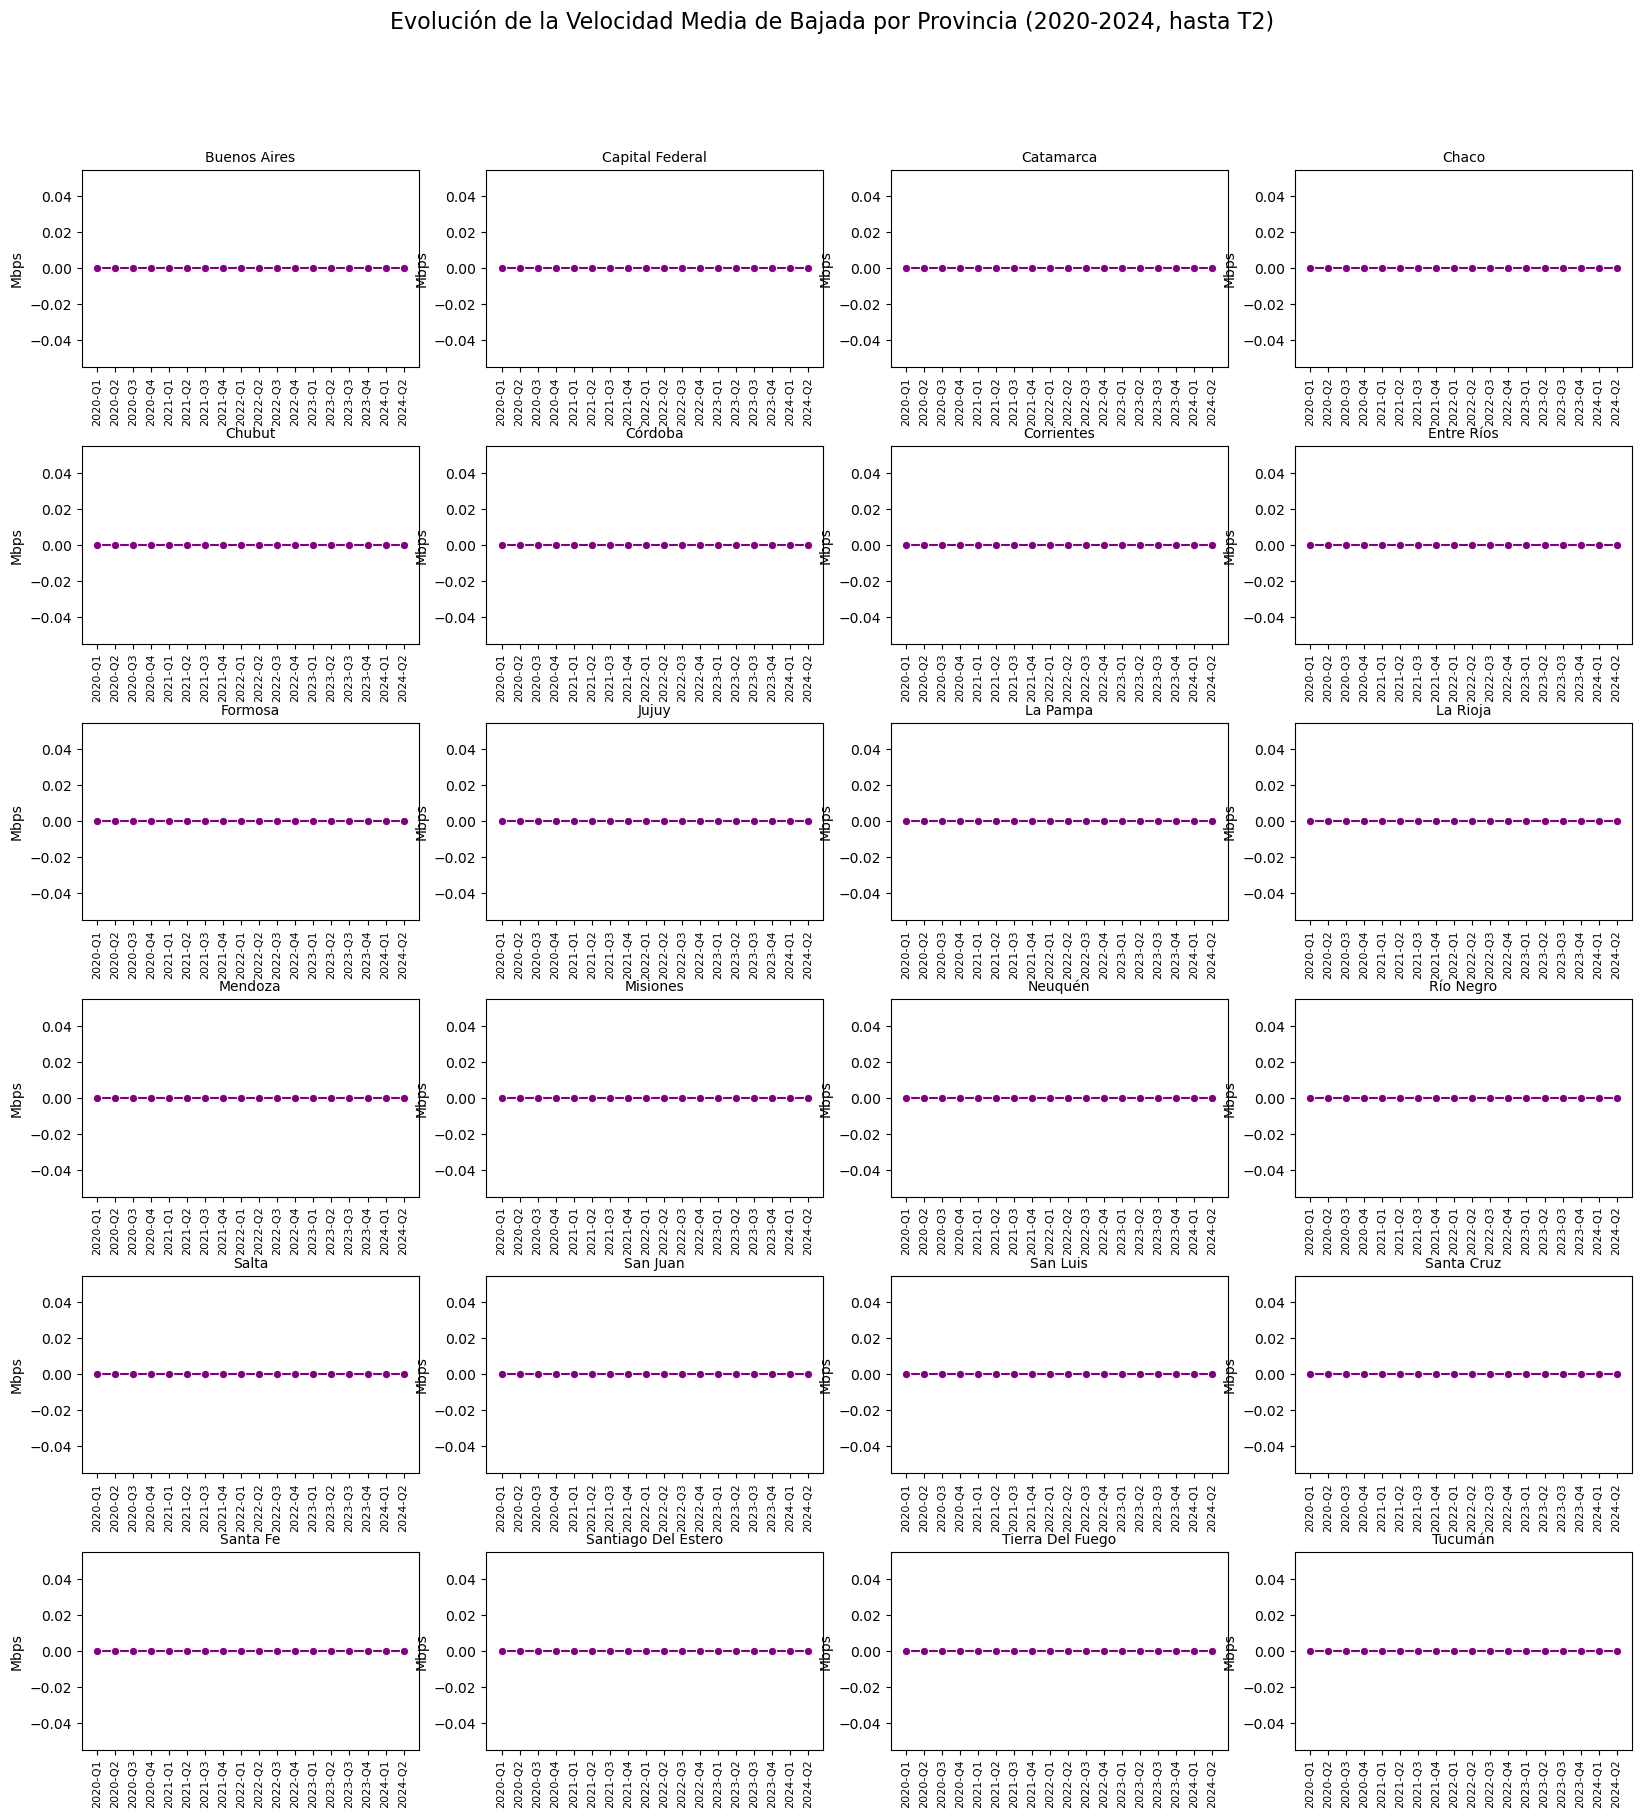

In [466]:
# Generar todos los trimestres hasta 2024-Q2
trimestres_completos = [
    f"{anio}-T{trimestre}"
    for anio in range(2020, 2025)  # Hasta 2024
    for trimestre in range(1, 5)
]

# Filtrar trimestres hasta 2024-Q2
trimestres_validos = [
    f"{anio}-Q{trimestre}"
    for anio in range(2020, 2025)
    for trimestre in range(1, 5) if (anio < 2024 or trimestre <= 2)  # Hasta 2024-Q2
]

# Generar combinaciones de provincia y trimestres
provincias = hoja4['provincia'].unique()
periodos_completos = pd.DataFrame([
    {'provincia': provincia, 'periodo': periodo}
    for provincia in provincias
    for periodo in trimestres_validos
])

# Crear columna "periodo" como combinación de anio y trimestre
hoja4['periodo'] = hoja4['anio'].astype(str) + '-T' + hoja4['trimestre'].astype(str)

# Calcular la velocidad promedio por trimestre y provincia
velocidad_por_provincia = (
    hoja4.groupby(['provincia', 'periodo'])['mbps_media_de_bajada']
    .mean()
    .reset_index()
)

# Asegurar que todas las combinaciones de provincias y periodos estén presentes
velocidad_por_provincia = pd.merge(
    periodos_completos, velocidad_por_provincia,
    on=['provincia', 'periodo'], how='left'
).fillna(0)  # Rellenar datos faltantes con 0

# Ordenar los datos por periodo
velocidad_por_provincia['periodo'] = pd.Categorical(
    velocidad_por_provincia['periodo'],
    categories=trimestres_validos,
    ordered=True
)
velocidad_por_provincia.sort_values(['provincia', 'periodo'], inplace=True)

# Crear subplots
fig, axes = plt.subplots(
    nrows=(len(provincias) + 3) // 4,  # Filas necesarias para organizar provincias
    ncols=4,  # Máximo 4 gráficos por fila
    figsize=(20, 20),
    constrained_layout=False
)
axes = axes.flatten()

# Iterar sobre las provincias y graficar
for i, provincia in enumerate(provincias):
    ax = axes[i]
    data = velocidad_por_provincia[velocidad_por_provincia['provincia'] == provincia]
    sns.lineplot(data=data, x='periodo', y='mbps_media_de_bajada', marker='o', ax=ax, color='purple')

    # Configuración del subplot
    ax.set_title(provincia, fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('Mbps')
    ax.tick_params(axis='x', rotation=90)
    ax.set_xticks(range(len(trimestres_validos)))  # Índices de los trimestres válidos
    ax.set_xticklabels(trimestres_validos, fontsize=8, ha='center')

# Ocultar subplots vacíos (si existen)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(top=0.9, hspace=0.4)

# Título general
fig.suptitle('Evolución de la Velocidad Media de Bajada por Provincia (2020-2024, hasta T2)', fontsize=16)
plt.show()


En todas las provincias se observa una tendencia creciente en la velocidad media de bajada, lo que indica una mejora en la calidad del servicio de Internet durante este período, probablemente afectada por crecimiento en la infraestructura o evolución de las tecnologías.

Provincias como Capital Federal, Buenos Aires, y Santa Cruz destacan por alcanzar las velocidades más altas (en algunos casos, superiores a los 100 Mbps).
Por otro lado, provincias como Catamarca, Formosa, y La Rioja presentan velocidades significativamente más bajas, lo que refleja una brecha digital persistente.

Algunas provincias muestran saltos bruscos en la velocidad media (como Catamarca, La Pampa, y San Luis) en períodos específicos. Esto podría deberse a la implementación de mejora tecnológica en infraestructura o en dispositivos de acceso.

Mientras provincias líderes como Capital Federal superan los 150 Mbps, algunas provincias como Formosa y Catamarca aún no alcanzan los 50 Mbps en promedio, lo que evidencia desigualdades significativas en el acceso a conexiones rápidas.

'Brecha' es la palabra clave en todos los gráficos.


# **KPIs**

# **Primer KPI :** 
# Aumentar Acceso a Internet por cada 100 Hogares por Provincia 

- Permite comparar el desempeño entre provincias y monitorear el progreso hacia la meta de reducir la brecha digital.

In [ ]:
hoja9.loc[:, 'fecha'] = pd.to_datetime(
    hoja9['anio'].astype(str) + '-' + ((hoja9['trimestre'] * 3 - 2).astype(str)) + '-01',
    errors='coerce'
)

In [ ]:
hoja9.head()

,anio,trimestre,provincia,accesos_por_cada_100_hogares,fecha,nuevo_acceso_calculado,kpi_aumento,cumple_kpi
0,2024,2,Buenos Aires,79.84,2024-04-01,81.4368,2.0,True
1,2024,2,Capital Federal,116.37,2024-04-01,118.6974,2.0,True
2,2024,2,Catamarca,68.81,2024-04-01,70.1862,2.0,True
3,2024,2,Chaco,44.06,2024-04-01,44.9412,2.0,True
4,2024,2,Chubut,86.33,2024-04-01,88.0566,2.0,False


Los valores temporales de referencia serán 'anio_actual' y 'trimestre_actual'. Los valores a comparar con el valor calculado con el porcentaje elegido serań 'anio_real' y 'trimestre_real'.

In [ ]:


def calcular_kpi_provincia(dataframe, provincia, anio_actual, trimestre_actual, anio_real, trimestre_real):
    """
    Calcula el KPI de aumento en accesos a Internet por cada 100 hogares y lo compara
    con el valor esperado en el dataframe.

    Parámetros:
    - dataframe: DataFrame con la información de penetración de hogares (penetracion_hogares).
    - provincia: Nombre de la provincia (str).
    - anio_actual: Año actual para calcular el acceso_actual (int).
    - trimestre_actual: Trimestre actual para calcular el acceso_actual (int).
    - anio_real: Año con el que se comparará el nuevo_acceso (int).
    - trimestre_real: Trimestre con el que se comparará el nuevo_acceso (int).

    Retorna:
    - Un diccionario con los resultados del cálculo y la comparación.
    """
    # Filtrar el dataframe para el acceso actual
    acceso_actual_row = dataframe[
        (dataframe['provincia'] == provincia) &
        (dataframe['anio'] == anio_actual) &
        (dataframe['trimestre'] == trimestre_actual)
    ]

    # Filtrar el dataframe para el acceso real (año y trimestre de referencia)
    acceso_real_row = dataframe[
        (dataframe['provincia'] == provincia) &
        (dataframe['anio'] == anio_real) &
        (dataframe['trimestre'] == trimestre_real)
    ]

    # Verificar si se encuentran datos válidos para ambos periodos
    if acceso_actual_row.empty or acceso_real_row.empty:
        return {"error": "Datos insuficientes para calcular el KPI"}

    # Obtener el acceso actual y el acceso real desde el dataframe
    acceso_actual = acceso_actual_row['accesos_por_cada_100_hogares'].values[0]
    acceso_real = acceso_real_row['accesos_por_cada_100_hogares'].values[0]

    # Calcular el nuevo acceso
    nuevo_acceso = acceso_actual * 1.02

    # Calcular el KPI
    kpi_aumento = ((nuevo_acceso - acceso_actual) / acceso_actual) * 100

    # Comparar el nuevo acceso con el valor real
    cumple_kpi = nuevo_acceso <= acceso_real

    # Retornar resultados en un diccionario
    return {
        "provincia": provincia,
        "anio_actual": anio_actual,
        "trimestre_actual": trimestre_actual,
        "acceso_actual": acceso_actual,
        "nuevo_acceso_calculado": nuevo_acceso,
        "anio_real": anio_real,
        "trimestre_real": trimestre_real,
        "acceso_real": acceso_real,
        "kpi_aumento": kpi_aumento,
        "cumple_kpi": cumple_kpi
    }


Desempeño del KPI para los datos seleccionados :

In [ ]:
resultado = calcular_kpi_provincia(
    dataframe=hoja9,
    provincia="Buenos Aires",
    anio_actual=2024,
    trimestre_actual=1,
    anio_real=2024,
    trimestre_real=2
)

resultado


{'provincia': 'Buenos Aires',
 'anio_actual': 2024,
 'trimestre_actual': 1,
 'acceso_actual': 81.1,
 'nuevo_acceso_calculado': 82.722,
 'anio_real': 2024,
 'trimestre_real': 2,
 'acceso_real': 79.84,
 'kpi_aumento': 2.0,
 'cumple_kpi': False}

In [ ]:
hoja9.to_csv('kpi_1.csv', index=False)

## **Segundo KPI :** 
# Crecimiento de la Tecnología de Fibra Óptica

- Mide el crecimiento absoluto en términos de número de accesos por fibra óptica.
- Se eligió la fibra óptica por su influencia en el aumento de la calidad de servicio y su correlación directa con los ingresos.
- Permite evaluar como evolucionan los accesos de esta tecnología a nivel nacional.

In [ ]:
hoja6.head()

,anio,trimestre,adsl,cablemodem,fibra_optica,wireless,otros_tecnologia,total_tecnologia,periodo
0,2024,2,733491,5867504,4169958,593197,191957,11556107,Abr-Jun 2024
1,2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024
2,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
3,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
4,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023


In [ ]:
hoja6.loc[:, 'fecha'] = pd.to_datetime(
    hoja6['anio'].astype(str) + '-' + ((hoja6['trimestre'] * 3 - 2).astype(str)) + '-01',
    errors='coerce'
)

In [ ]:
hoja6.to_csv('2_y_3_kpi.csv')

In [ ]:
def calcular_kpi_fibra(dataframe, anio_actual, trimestre_actual, anio_real, trimestre_real, incremento_esperado=2):
    """
    Calcula el KPI de incremento en accesos por tecnología de fibra óptica
    comparando dos periodos específicos.

    Parámetros:
    - dataframe: DataFrame con la información de accesos por tecnología.
    - anio_actual: Año actual para calcular los accesos actuales (int).
    - trimestre_actual: Trimestre actual para calcular los accesos actuales (int).
    - anio_real: Año con el que se comparará el nuevo acceso (int).
    - trimestre_real: Trimestre con el que se comparará el nuevo acceso (int).
    - incremento_esperado: Porcentaje esperado de incremento en fibra óptica (default: 2%).

    Retorna:
    - Un diccionario con los resultados del cálculo y la comparación.
    """

    # Filtrar el dataframe para los accesos actuales por fibra óptica
    acceso_actual_row = dataframe[
        (dataframe['anio'] == anio_actual) &
        (dataframe['trimestre'] == trimestre_actual)
    ]

    # Filtrar el dataframe para los accesos reales por fibra óptica (año y trimestre de referencia)
    acceso_real_row = dataframe[
        (dataframe['anio'] == anio_real) &
        (dataframe['trimestre'] == trimestre_real)
    ]

    # Verificar si se encuentran datos válidos para ambos periodos
    if acceso_actual_row.empty or acceso_real_row.empty:
        return {"error": "Datos insuficientes para calcular el KPI"}

    # Obtener los valores de accesos actuales y reales desde el dataframe
    acceso_actual = acceso_actual_row['fibra_optica'].values[0]
    acceso_real = acceso_real_row['fibra_optica'].values[0]

    # Calcular el nuevo acceso esperado (incremento esperado)
    nuevo_acceso = acceso_actual * (1 + incremento_esperado / 100)

    # Calcular el KPI
    kpi_fibra = ((nuevo_acceso - acceso_actual) / acceso_actual) * 100

    # Comparar el nuevo acceso con el valor real
    cumple_kpi = nuevo_acceso <= acceso_real

    # Retornar resultados en un diccionario
    return {
        "anio_actual": anio_actual,
        "trimestre_actual": trimestre_actual,
        "acceso_actual_fibra": acceso_actual,
        "nuevo_acceso_calculado": nuevo_acceso,
        "anio_real": anio_real,
        "trimestre_real": trimestre_real,
        "acceso_real_fibra": acceso_real,
        "kpi_fibra": kpi_fibra,
        "cumple_kpi": cumple_kpi
    }

Desempeño del KPI para los datos seleccionados :

In [ ]:
resultado = calcular_kpi_fibra(
    dataframe=hoja6,
    anio_actual=2024,
    trimestre_actual=1,
    anio_real=2024,
    trimestre_real=2
)

In [ ]:
resultado

{'anio_actual': 2024,
 'trimestre_actual': 1,
 'acceso_actual_fibra': 4015101,
 'nuevo_acceso_calculado': 4095403.02,
 'anio_real': 2024,
 'trimestre_real': 2,
 'acceso_real_fibra': 4169958,
 'kpi_fibra': 2.0000000000000004,
 'cumple_kpi': True}

# **Tercer KPI :** 
# Incremento en la penetración de fibra óptica en el mercado general

- Mide el crecimiento relativo como proporción del total de accesos de todas las tecnologías.

- Permite evaluar cómo está posicionada la fibra óptica en comparación con otras tecnologías.


In [ ]:
def calcular_kpi_penetracion_fibra(dataframe, anio_actual, trimestre_actual, anio_referencia, trimestre_referencia, meta_incremento=3):
    """
    Calcula si el KPI de incremento en la penetración de fibra óptica se cumple.

    Parámetros:
    - dataframe: DataFrame con los datos de accesos por tecnología.
    - anio_actual: Año actual para calcular la penetración actual (int).
    - trimestre_actual: Trimestre actual para calcular la penetración actual (int).
    - anio_referencia: Año de referencia para calcular la penetración base (int).
    - trimestre_referencia: Trimestre de referencia para calcular la penetración base (int).
    - meta_incremento: Meta de incremento esperado en la penetración (%) (default: 3%).

    Retorna:
    - Un diccionario con los resultados del cálculo, incluyendo si se cumple la meta.
    """

    # Filtrar el dataframe para los accesos actuales
    acceso_actual_row = dataframe[
        (dataframe['anio'] == anio_actual) &
        (dataframe['trimestre'] == trimestre_actual)
    ]

    # Filtrar el dataframe para los accesos de referencia
    acceso_referencia_row = dataframe[
        (dataframe['anio'] == anio_referencia) &
        (dataframe['trimestre'] == trimestre_referencia)
    ]

    # Verificar si se encuentran datos válidos para ambos periodos
    if acceso_actual_row.empty or acceso_referencia_row.empty:
        return {"error": "Datos insuficientes para calcular el KPI"}

    # Obtener accesos de fibra óptica y totales para ambos periodos
    fibra_actual = acceso_actual_row['fibra_optica'].values[0]
    total_actual = acceso_actual_row['total_tecnologia'].values[0]
    fibra_referencia = acceso_referencia_row['fibra_optica'].values[0]
    total_referencia = acceso_referencia_row['total_tecnologia'].values[0]

    # Calcular la penetración de fibra óptica para ambos periodos
    penetracion_actual = (fibra_actual / total_actual) * 100
    penetracion_referencia = (fibra_referencia / total_referencia) * 100

    # Calcular el incremento en la penetración
    incremento_penetracion = ((penetracion_actual - penetracion_referencia) / penetracion_referencia) * 100

    # Comparar contra la meta
    cumple_kpi = incremento_penetracion >= meta_incremento

    # Retornar resultados
    return {
        "anio_actual": anio_actual,
        "trimestre_actual": trimestre_actual,
        "penetracion_actual": penetracion_actual,
        "anio_referencia": anio_referencia,
        "trimestre_referencia": trimestre_referencia,
        "penetracion_referencia": penetracion_referencia,
        "incremento_penetracion": incremento_penetracion,
        "meta_incremento": meta_incremento,
        "cumple_kpi": cumple_kpi
    }


Desempeño del KPI para los datos seleccionados :

In [ ]:
resultado = calcular_kpi_penetracion_fibra(
    dataframe=hoja6,
    anio_actual=2024,
    trimestre_actual=2,
    anio_referencia=2024,
    trimestre_referencia=1,
    meta_incremento=3
)

In [ ]:
resultado

{'anio_actual': 2024,
 'trimestre_actual': 2,
 'penetracion_actual': 36.084453008266536,
 'anio_referencia': 2024,
 'trimestre_referencia': 1,
 'penetracion_referencia': 34.514288298033655,
 'incremento_penetracion': 4.549317942396442,
 'meta_incremento': 3,
 'cumple_kpi': True}